# **POIROT** (**P**hen**O**mena explanat**I**on f**RO**m **T**ext)
Master Degree in Computer Science and Engineering<br/>
Text Mining Course

<img src="https://drive.google.com/uc?id=181WkHI3kHYjnfMF4fC-p2zygWZsa6SBC" alt="POIROT Social Preview" width="600"/>

## Abstract

Learning knowledge from text is becoming increasingly important as the amount of unstructured content on the Web rapidly grows. Despite recent breakthroughs in natural language understanding, the explanation of phenomena from textual documents is still a difficult and poorly addressed problem. Additionally, current NLP solutions often require labeled data, are domain-dependent, and based on black box models. In this paper, we introduce POIROT, a new descriptive text mining methodology for phenomena explanation. POIROT is designed to provide accurate and interpretable results in unsupervised settings, quantifying them based on their statistical significance. We evaluated POIROT on a medical case study, with the aim of learning the "voice of patients" from short social posts. Taking Esophageal Achalasia as a reference, we automatically derived scientific correlations with
79\% F1-measure score and built useful explanations on the patients' point of view on topics such as symptoms, treatments, drugs, and foods.

## Authors

*   Giacomo Frisoni, PhD Student @ DISI - University of Bologna<br/>giacomo.frisoni[at]unibo.it
*   Gianluca Moro, Research Associate @ DISI - University of Bologna<br/>gianluca.moro[at]unibo.it

## Related Papers

*   DATA 2020. [ResearchGate](https://www.researchgate.net/publication/342963744_Learning_Interpretable_and_Statistically_Significant_Knowledge_from_Unlabeled_Corpora_of_Social_Text_Messages_A_Novel_Methodology_of_Descriptive_Text_Mining), [ScitePress](https://www.scitepress.org/PublicationsDetail.aspx?ID=c10WqNt1NgM=&t=1). Giacomo Frisoni, Gianluca Moro, and Antonella Carbonaro. Learninginterpretable and statistically significant knowledge from unlabeled cor-pora of social text messages: A novel methodology of descriptive textmining. In Slimane Hammoudi, Christoph Quix, and Jorge Bernardino, editors, Proceedings of the 9th International Conference on Data Science,Technology and Applications, DATA 2020, Lieusaint, Paris, France, July7-9, 2020, pages 121–132. SciTePress, 2020. **Best Paper Award**.
*   KDIR 2020. [ResearchGate](https://www.researchgate.net/publication/346520673_Unsupervised_Descriptive_Text_Mining_for_Knowledge_Graph_Learning), [ScitePress](https://www.scitepress.org/PublicationsDetail.aspx?ID=3mrzEAn57Cc=&t=1). Frisoni, G.; Moro, G. and Carbonaro, A. (2020). Unsupervised Descriptive Text Mining for Knowledge Graph Learning.In Proceedings of the 12th International Joint Conference on Knowledge Discovery, Knowledge Engineering and Knowledge Management - Volume 1: KDIR, ISBN 978-989-758-474-9, pages 316-324. DOI: 10.5220/0010153603160324.
*   DATA 2020 Springer Extension. Frisoni, G. and Moro, G., 2020. Phenomena Explanation from Text: Unsupervised Learning of Interpretable and Statistically Significant Knowledge. Accepted as regular paper to appear in Springer Book of DATA 2020.

## POIROT Architecture

<img src="https://drive.google.com/uc?id=1IITxJV5HV7NsWwLCe37kt35lbf5ZnBcd" alt="POIROT Architecture" width="650"/>


In [ ]:
# Activate R magic
%load_ext rpy2.ipython

In [ ]:
# Activate the interactive visualization of pandas dataframes
%load_ext google.colab.data_table

## 🧬 Esophageal Achalasia

<img src="https://drive.google.com/uc?id=1QPhWPwBCrKPsyJzsHPfWDYTMOQ7wLBYj" alt="Esophageal Achalasia" width="600"/>

We focused on Esophageal Achalasia (ORPHA:930), a rare disorder of the esophagus characterized by the inability of the lower esophageal sphincter (LES) to relax. Collaborating with Associazione Malati Acalasia Esofagea (AMAE) - the main Italian patient organization for the disease under consideration - we downloaded anonymous text documents from the Facebook Group directly managed from it (with about **2000 current users** and **> 10 years of history**).
The dataset consists of **6,917 posts** and **61,692** first-level comments.

<img src="https://drive.google.com/uc?id=1eWzE77u-skqpjwTAmjeADxbg6dwXhUsC" alt="Dataset" width="700"/>

## 📦 Packages Loading

⚡ We avoid tens of minutes of waiting by mounting Google Drive and referring in the virtual file system to a directory with the packages already pre-installed. <font color="blue"> Before continuing with the next instructions, make sure you have uploaded [this directory](https://drive.google.com/drive/folders/1J8DDPAbIcVJsyikvWf0pbafwEszRQsQt?usp=sharing) to your Drive repository. </font>

In [ ]:
# Connect the notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


<font color="blue"> Specify the path within your Google Drive repository to the directory with the pre-installed R packages </font>

In [ ]:
%R lib_loc <- "/content/drive/My Drive/PhD/POIROT/rlib"

'/content/drive/My Drive/PhD/POIROT/rlib'


In [ ]:
# Change R default library path to handle dependecies from custom directory
%%R
.libPaths(c(lib_loc, .libPaths()))
.libPaths()

[1] "/content/drive/My Drive/PhD/POIROT/rlib"
[2] "/usr/local/lib/R/site-library"          
[3] "/usr/lib/R/site-library"                
[4] "/usr/lib/R/library"                     


≈ 4 minutes required ⏱

In [ ]:
%%R

# Package for progress bar
library(progress, lib = lib_loc)

# Package for working with data frame
library(plyr, lib = lib_loc)
library(dplyr, lib = lib_loc)

# Package for string manipulation
# (e.g. replacement of occurrences of a matched pattern in a string)
library(stringr, lib = lib_loc)

# Package for functional programming toolkit
library(purrr, lib = lib_loc)

# Package for plotting charts
library(ggplot2, lib = lib_loc)

# Package for data frame sorting
library(doBy, lib = lib_loc)

# Package for multi substitution (i.e., multi gsub)
library(textclean, lib = lib_loc)

# Package for Text Mining utilities
# Includes preprocessing operations similar to StringToWordVector in Weka and Corpus handling
# (content transformation, stopwords removal, single words extraction, common features selection etc.)
library(tm, lib = lib_loc)

# Package for quantitative text analysis
library(quanteda, lib = lib_loc)

# Package for LSA analysis
library(lsa, lib = lib_loc)

# Package for Fast Randomized Singular Value Decomposition
library(rsvd, lib = lib_loc)

# Package for t-SNE
library(Rtsne, lib = lib_loc)

# Package for Locality Sensitive Hashing (LSH)
library(LSHR, lib = lib_loc)

# Package for dendrogram editing
library(dendextend, lib = lib_loc)

# Package for hierarchical clustering with bootstrapped p-values
library(pvclust, lib = lib_loc)

# Package for clustering visualization
library(factoextra, lib = lib_loc)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘purrr’


R[write to console]: The following object is masked from ‘package:plyr’:

    compact


R[write to console]: 
Attaching package: ‘doBy’


R[write to console]: The following object is masked from ‘package:dplyr’:

    order_by


R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate


R[write to console]: Package version: 2.1.2

R[write to console]: Parallel computing: 2 of 2 threads used

## 📚 Data Loading

Download the .rds files needed for the tutorial.
After this operation, refresh the */content* directory to see them.</br>
In this notebook we mainly focus on the Italian language.

*Note 1:* due to the sensitivity of the data, we cannot give you access to the entire dataset. In the following steps we will show you a sample of fully anonymous 2838 posts and first-level comments (out of 67653).

*Note 2:* to make you appreciate the achievable results, we still provide you with the entire term-documents matrix and the opinion mining results obtained from the original corpus.

In [ ]:
%%R

downloadData <- function(lang) {
  
  if (!(lang %in% c("it", "en"))) {
    stop("Not supported language")
  }

  if (lang == "it") {

    # Download files

    # Useful supporting data
    system("gdown --id 1zA6PQvk5M3G2r4_5uSePG82StxSgbkKB") # Slang words
    system("gdown --id 13uh6LZn0bUv40W9krLYR7cEuA7xxfhb3") # Stopwords
    system("gdown --id 1BC5PwkLCmP9JoDxDzLiBKFqvbC_OqS3Y") # Concepts (all)
    system("gdown --id 1xVIe8rhwnC9UCs37drHTOGIuFxTUL2UX") # Concepts (poem)
    system("gdown --id 1BLX5nbvZ8ddwc2-Dnv8JCax6GRcfyVLW") # Concepts (heller-dor)
    system("gdown --id 1ypFpHt1Onoiis6eHbwfb2gMNfwWCsUbq") # Reconciled Entities
    system("gdown --id 1l8CBUlMKA8-UiezkbkLH98zr3J4thVXu") # Hu Liu (pos)
    system("gdown --id 1v0Li4F5sBQDd-RY5cu-EVKOZ5Y6JtSCw") # Hu Liu (neg)
    system("gdown --id 1PpOSQgwbtVFpl0pp85-Ucs0W2zwFNjTk") # Achalasia lexicon (pos)
    system("gdown --id 1Qz4OEDSwIZmEbqf_8DE3eteaPhqVo3dE") # Achalasia lexicon (neg)
    system("gdown --id 1VMHW7U6iBhNJ1BVQo_973Kn897j3iWWE") # Emote (pos)
    system("gdown --id 1og-Kgm9bKHqdvNcfQNRGTiOnW0-yPKyi") # Emote (neg)
    system("gdown --id 1WIVmrss8PNlxzTeOxgrl0qujT7IVE1Nx") # Ner lemmatized gold standards (pos)
    system("gdown --id 1BTx5QHzReWTEOpE-eMFBS_u-CI25EE_M") # Ner lemmatized gold standards (neg)

    # Documents (sample)
    system("gdown --id 1qZ_nNbL4APfXitd_EvnRNjOJL-bCpZPL") # Documents

    # Documents (all)
    system("gdown --id 1QTMD-K0RaaYCq-KMJYOy1btUptWer1ZE") # Complete unlemmatized term-document matrix (all)
    system("gdown --id 1gJHpjs5khL5p5XEh9wWZCdH5gubKIBV7") # Complete lemmatized term-document matrix (all)
    system("gdown --id 18xxe45DEUjicHKtiVOMbmFqOet9TIeQG") # Complete lemmatized term-document matrix (poem)
    system("gdown --id 1htIxPHZqCM2J8IHgjaLQSm9tqalBB2gB") # Complete lemmatized term-document matrix (hellerdor)
    system("gdown --id 1sCYVtVWNtCicIPOsMiwMkQXXWGtr78Wt") # Opinion mining classes (all)
    system("gdown --id 1_E4jEl2n585jyiHWyLVal7SCmDCxTYXh") # Opinion mining classes (poem)
    system("gdown --id 19mq7LozdK-VM5NjTGfjXou71a5-fzpEJ") # Opinion mining classes (hellerdor)
    system("gdown --id 14WLOfI3UPvIC20k7-G2Pi9WfvG92X9TU") # Global adjacencies

  } else if (lang == "en") {
    
    system("gdown --id 1bkTMfrTBeNgb6G0jl-ndNgbG-wSlnu73") # Slang words
    system("gdown --id 1vOrn-XOppcPU2XS2e5C0PiIVwP3o5WbI") # Stopwords

  }
  
}

In [ ]:
%%R
lang <- "it"
downloadData(lang)

Read the downloaded files and load the precomputed R objects into memory. 

In [ ]:
%%R

loadData <- function() {

  # Slang words
  # ---------------

  slang_words <- readRDS("slang_words.rds")

  # Stopwords
  # ---------------

  stopwords <- readRDS("stopwords.rds")

  # Concepts
  # ---------------

  all_concept <- readRDS("all_concept.rds")
  poem_concept <- readRDS("poem_concept.rds")
  hellerdor_concept <- readRDS("hellerdor_concept.rds")

  # Documents
  # ---------------

  # Documents
  # facebook id, quality preprocessed text, quality preprocessed text with tagged entities,
  # creation date, creation year, positive opinion score, negative opinion score, opinion class
  documents <- readRDS("limited_documents.rds")
  # Translate non-ASCII characters for UTF-8 conversion
  documents$original_text <- stringi::stri_trans_general(documents$original_text, "Latin-ASCII")

  # Entities
  # ---------------

  # Reconciled entities detected by NER
  reconciled_entities <- readRDS("reconciled_entities.rds")

  # Opinion Lexicon
  # ---------------

  # Hu & Liu
  hu_liu_pos <- readRDS("hu_liu_pos.rds")
  hu_liu_neg <- readRDS("hu_liu_neg.rds")

  # Negative entities by class
  neg_entities <- as.vector(reconciled_entities$entity_id[plyr::laply(
    reconciled_entities$labels,
    function(entity_labels) {any(c("Disease", "Symptom") %in% entity_labels)})])

  # Integrative opinion words for Achalasia
  achalasia_pos <- readRDS("achalasia_pos.rds")
  achalasia_neg <- readRDS("achalasia_neg.rds")

  # Opinion related to normalized emotes
  emote_pos <- readRDS("emote_pos.rds")
  emote_neg <- readRDS("emote_neg.rds")

  # Global lists
  pos_words <- unique(c(hu_liu_pos, achalasia_pos, emote_pos))
  neg_words <- unique(c(hu_liu_neg, neg_entities, achalasia_neg, emote_neg))

  # Precomputed opinion classes for all documents about the different concepts
  opinion_classes_all <- readRDS("opinion_classes_all.rds")
  opinion_classes_poem <- readRDS("opinion_classes_poem.rds")
  opinion_classes_hellerdor <- readRDS("opinion_classes_hellerdor.rds")

  # Term-document matrix
  # ---------------

  # Term-document matrix with all standard and entity terms (i.e., tags after NER reconciliation) and without lemmatization
  tdmc_ner_lemmatized_all <- readRDS("tdmc_ner_lemmatized_all.rds")
  tdmc_ner_lemmatized_poem <- readRDS("tdmc_ner_lemmatized_poem.rds")
  tdmc_ner_lemmatized_hellerdor <- readRDS("tdmc_ner_lemmatized_hellerdor.rds")
  tdmc_ner_unlemmatized_all <- readRDS("tdmc_ner_unlemmatized_all.rds")

  # Gold standards
  # ---------------

  kc_pos <- readRDS("kc_pos.rds")
  kc_neg <- readRDS("kc_neg.rds")

  # Global adjacencies
  # ---------------

  global_adjacencies <- readRDS("global_adjacencies.rds")
  
  list(
    slang_words = slang_words,
    stopwords = stopwords,
    concepts = list(poem = poem_concept, hellerdor = hellerdor_concept, all = all_concept),
    opinion_lexicon = list(pos_words = pos_words, neg_words = neg_words),
    documents = documents,
    reconciled_entities = reconciled_entities,
    opinion_classes_all = opinion_classes_all,
    opinion_classes_poem = opinion_classes_poem,
    opinion_classes_hellerdor = opinion_classes_hellerdor,
    tdmc_ner_lemmatized_all = tdmc_ner_lemmatized_all,
    tdmc_ner_lemmatized_poem = tdmc_ner_lemmatized_poem,
    tdmc_ner_lemmatized_hellerdor = tdmc_ner_lemmatized_hellerdor,
    tdmc_ner_unlemmatized_all = tdmc_ner_unlemmatized_all,
    gold_standards = list(kc_pos = kc_pos, kc_neg = kc_neg),
    global_adjacencies = global_adjacencies
  )

}

In [ ]:
%%R -o documents

data <- loadData()

slang_words <- data$slang_words
stopwords <- data$stopwords
concepts <- data$concepts
opinion_lexicon <- data$opinion_lexicon
documents <- data$documents
reconciled_entities <- data$reconciled_entities
opinion_classes_all <- data$opinion_classes_all
opinion_classes_poem <- data$opinion_classes_poem
opinion_classes_hellerdor <- data$opinion_classes_hellerdor
tdmc_ner_lemmatized_all <- data$tdmc_ner_lemmatized_all
tdmc_ner_lemmatized_poem <- data$tdmc_ner_lemmatized_poem
tdmc_ner_lemmatized_hellerdor <- data$tdmc_ner_lemmatized_hellerdor
tdmc_ner_unlemmatized_all <- data$tdmc_ner_unlemmatized_all
gold_standards <- data$gold_standards
global_adjacencies <- data$global_adjacencies
rm(data)

In [ ]:
%%R

install.packages("jsonlite")
library(jsonlite)

it_male_names <- fromJSON("ITGivenMale.json") %>% as.data.frame
it_male_names = unlist(lapply(it_male_names$name, tolower))
print(it_male_names[1:5])

it_female_names <- fromJSON("ITGivenFemale.json") %>% as.data.frame
it_female_names = unlist(lapply(it_female_names$name, tolower))
print(it_female_names[1:5])

R[write to console]: Installing package into ‘/content/drive/My Drive/PhD/POIROT/rlib’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/jsonlite_1.7.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 421716 bytes (411 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console


Error: lexical error: invalid char in json text.
                                       ITGivenMale.json
                     (right here) ------^


RInterpreterError: ignored

In [ ]:
%%R

# TEMP FOR COMMONGEN
system("gdown --id 1vOrn-XOppcPU2XS2e5C0PiIVwP3o5WbI")
stopwords_1 <- readRDS("stopwords.rds")
stopwords_2 <- readLines("stopwords-en.txt")
stopwords_3 <- c("0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz")
stopwords_4 <- c("i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now")
stopwords_5 <- c("a\'s" , "able" , "about" , "above" , "according" , "accordingly" , "across" , "actually" , "after" , "afterwards" , "again" , "against" , "ain\'t" , "all" , "allow" , "allows" , "almost" , "alone" , "along" , "already" , "also" , "although" , "always" , "am" , "among" , "amongst" , "an" , "and" , "another" , "any" , "anybody" , "anyhow" , "anyone" , "anything" , "anyway" , "anyways" , "anywhere" , "apart" , "appear" , "appreciate" , "appropriate" , "are" , "aren\'t" , "around" , "as" , "aside" , "ask" , "asking" , "associated" , "at" , "available" , "away" , "awfully" , "be" , "became" , "because" , "become" , "becomes" , "becoming" , "been" , "before" , "beforehand" , "behind" , "being" , "believe" , "below" , "beside" , "besides" , "best" , "better" , "between" , "beyond" , "both" , "brief" , "but" , "by" , "c\'mon" , "c\'s" , "came" , "can" , "can\'t" , "cannot" , "cant" , "cause" , "causes" , "certain" , "certainly" , "changes" , "clearly" , "co" , "com" , "come" , "comes" , "concerning" , "consequently" , "consider" , "considering" , "contain" , "containing" , "contains" , "corresponding" , "could" , "couldn\'t" , "course" , "currently" , "definitely" , "described" , "despite" , "did" , "didn\'t" , "different" , "do" , "does" , "doesn\'t" , "doing" , "don\'t" , "done" , "down" , "downwards" , "during" , "each" , "edu" , "eg" , "eight" , "either" , "else" , "elsewhere" , "enough" , "entirely" , "especially" , "et" , "etc" , "even" , "ever" , "every" , "everybody" , "everyone" , "everything" , "everywhere" , "ex" , "exactly" , "example" , "except" , "far" , "few" , "fifth" , "first" , "five" , "followed" , "following" , "follows" , "for" , "former" , "formerly" , "forth" , "four" , "from" , "further" , "furthermore" , "get" , "gets" , "getting" , "given" , "gives" , "go" , "goes" , "going" , "gone" , "got" , "gotten" , "greetings" , "had" , "hadn\'t" , "happens" , "hardly" , "has" , "hasn\'t" , "have" , "haven\'t" , "having" , "he" , "he\'s" , "hello" , "help" , "hence" , "her" , "here" , "here\'s" , "hereafter" , "hereby" , "herein" , "hereupon" , "hers" , "herself" , "hi" , "him" , "himself" , "his" , "hither" , "hopefully" , "how" , "howbeit" , "however" , "i\'d" , "i\'ll" , "i\'m" , "i\'ve" , "ie" , "if" , "ignored" , "immediate" , "in" , "inasmuch" , "inc" , "indeed" , "indicate" , "indicated" , "indicates" , "inner" , "insofar" , "instead" , "into" , "inward" , "is" , "isn\'t" , "it" , "it\'d" , "it\'ll" , "it\'s" , "its" , "itself" , "just" , "keep" , "keeps" , "kept" , "know" , "known" , "knows" , "last" , "lately" , "later" , "latter" , "latterly" , "least" , "less" , "lest" , "let" , "let\'s" , "like" , "liked" , "likely" , "little" , "look" , "looking" , "looks" , "ltd" , "mainly" , "many" , "may" , "maybe" , "me" , "mean" , "meanwhile" , "merely" , "might" , "more" , "moreover" , "most" , "mostly" , "much" , "must" , "my" , "myself" , "name" , "namely" , "nd" , "near" , "nearly" , "necessary" , "need" , "needs" , "neither" , "never" , "nevertheless" , "new" , "next" , "nine" , "no" , "nobody" , "non" , "none" , "noone" , "nor" , "normally" , "not" , "nothing" , "novel" , "now" , "nowhere" , "obviously" , "of" , "off" , "often" , "oh" , "ok" , "okay" , "old" , "on" , "once" , "one" , "ones" , "only" , "onto" , "or" , "other" , "others" , "otherwise" , "ought" , "our" , "ours" , "ourselves" , "out" , "outside" , "over" , "overall" , "own" , "particular" , "particularly" , "per" , "perhaps" , "placed" , "please" , "plus" , "possible" , "presumably" , "probably" , "provides" , "que" , "quite" , "qv" , "rather" , "rd" , "re" , "really" , "reasonably" , "regarding" , "regardless" , "regards" , "relatively" , "respectively" , "right" , "said" , "same" , "saw" , "say" , "saying" , "says" , "second" , "secondly" , "see" , "seeing" , "seem" , "seemed" , "seeming" , "seems" , "seen" , "self" , "selves" , "sensible" , "sent" , "serious" , "seriously" , "seven" , "several" , "shall" , "she" , "should" , "shouldn\'t" , "since" , "six" , "so" , "some" , "somebody" , "somehow" , "someone" , "something" , "sometime" , "sometimes" , "somewhat" , "somewhere" , "soon" , "sorry" , "specified" , "specify" , "specifying" , "still" , "sub" , "such" , "sup" , "sure" , "t\'s" , "take" , "taken" , "tell" , "tends" , "th" , "than" , "thank" , "thanks" , "thanx" , "that" , "that\'s" , "thats" , "the" , "their" , "theirs" , "them" , "themselves" , "then" , "thence" , "there" , "there\'s" , "thereafter" , "thereby" , "therefore" , "therein" , "theres" , "thereupon" , "these" , "they" , "they'd" , "they\'ll" , "they\'re" , "they\'ve" , "think" , "third" , "this" , "thorough" , "thoroughly" , "those" , "though" , "three" , "through" , "throughout" , "thru" , "thus" , "to" , "together" , "too" , "took" , "toward" , "towards" , "tried" , "tries" , "truly" , "try" , "trying" , "twice" , "two" , "un" , "under" , "unfortunately" , "unless" , "unlikely" , "until" , "unto" , "up" , "upon" , "us" , "use" , "used" , "useful" , "uses" , "using" , "usually" , "value" , "various" , "very" , "via" , "viz" , "vs" , "want" , "wants" , "was" , "wasn\'t" , "way" , "we" , "we\'d" , "we\'ll" , "we\'re" , "we\'ve" , "welcome" , "well" , "went" , "were" , "weren\'t" , "what" , "what\'s" , "whatever" , "when" , "whence" , "whenever" , "where" , "where\'s" , "whereafter" , "whereas" , "whereby" , "wherein" , "whereupon" , "wherever" , "whether" , "which" , "while" , "whither" , "who" , "who\'s" , "whoever" , "whole" , "whom" , "whose" , "why" , "will" , "willing" , "wish" , "with" , "within" , "without" , "won\'t" , "wonder" , "would" , "wouldn\'t" , "yes" , "yet" , "you" , "you\'d" , "you\'ll" , "you\'re" , "you\'ve" , "your" , "yours" , "yourself" , "yourselves" , "zero")
stopwords_6 <- c("a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz")

stopwords <- unique(c(stopwords_1, stopwords_2, stopwords_3, stopwords_4,
                      stopwords_5, stopwords_6, it_male_names, it_female_names))
saveRDS(stopwords, "stopwords.rds")

R[write to console]: Error in file(con, "r") : cannot open the connection

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In file(con, "r") :
R[write to console]: 
 
R[write to console]:  cannot open file 'stopwords-en.txt': No such file or directory




Error in file(con, "r") : cannot open the connection


RInterpreterError: ignored

### Slang Preview

In [ ]:
%R print(slang_words)

      slang                     phrase
1         +                        più
2        +-                 più o meno
3       +o-                 più o meno
4         -                       meno
5       abb                 abbastanza
6      anke                      anche
7    ank'io                   anche io
8        bn                       bene
9         c                         ci
10 chissene            chi se ne frega
11       cm                       come
12      cmq                   comunque
13       cn                        con
14       cs                       così
15       d.                    dottore
16       dm                     domani
17      dmn                     domani
18      doc                    dottore
19     dot.                    dottore
20      dot                    dottore
21      dr.                    dottore
22       dp                       dopo
23       dr                       dire
24       dx                     destra
25       e'              

,slang,phrase
1,+,più
2,+-,più o meno
3,+o-,più o meno
4,-,meno
5,abb,abbastanza
...,...,...
85,xke,perchè
86,xkè,perchè
87,xo,però
88,xò,però


### Stopwords Preview

In [ ]:
%R print(stopwords)

    [1] "a"                                 "about"                            
    [3] "above"                             "after"                            
    [5] "again"                             "against"                          
    [7] "all"                               "am"                               
    [9] "an"                                "and"                              
   [11] "any"                               "are"                              
   [13] "aren't"                            "as"                               
   [15] "at"                                "be"                               
   [17] "because"                           "been"                             
   [19] "before"                            "being"                            
   [21] "below"                             "between"                          
   [23] "both"                              "but"                              
   [25] "by"                            

'a','about','above',...,'zopita','zoraide','zulina'


### Reconciled Entities Preview

Before Reconciliation:

![TextRazor NER/NEL on posts](https://drive.google.com/uc?id=1bIzIZYlrehsrpEYntfZDMI5POtWZpTWp)

After Reconciliation:

![Reconciled Entities](https://drive.google.com/uc?id=1SLuYj4OQE90zO6S7S0svmXil-W3M1T_1)



### Opinion Lexicon Preview

In [ ]:
%%R
message("n pos words: ", length(opinion_lexicon$pos_words))
print(opinion_lexicon$pos_words[80:100])
message("n neg words: ", length(opinion_lexicon$neg_words))
print(opinion_lexicon$neg_words[4260:4280])

R[write to console]: n pos words: 1702



 [1] "stupisce"        "Stupefacente"    "incredibilmente" "ambizioso"      
 [5] "ambiziosamente"  "migliorare"      "docile"          "amenità"        
 [9] "amabilità"       "amiabily"        "amabile"         "amicability"    
[13] "amichevole"      "amichevolmente"  "amicizia"        "ampio"          
[17] "ampiamente"      "divertire"       "divertente"      "amusingly"      
[21] "angelo"         


R[write to console]: n neg words: 4280



 [1] "cattivo segno" "peggiorato"    "peggiorata"    "sfavorevoli"  
 [5] "fastidiosa"    "perturbante"   "sofferenze"    "sofferente"   
 [9] "sofferto"      "sofferta"      "sofferte"      "non funziona" 
[13] "pentita"       "difficolta"    "disperata"     "confusa"      
[17] "indecisa"      "spaventa"      "spaventato"    "spaventata"   
[21] "emotebad"     


### Starting Corpus Preview

In [ ]:
%%R

# Min and max date
print(min(documents$creation_date))
print(max(documents$creation_date))

# Statistics about characters
print(summary(stringi::stri_length(documents$original_text)))

# Statistics about words
print(summary(stringi::stri_count(documents$original_text, regex="\\w+")))

[1] "2018-10-01"
[1] "2019-02-01"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    31.0    68.5   126.3   162.0  2996.0 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    5.00   12.00   22.19   29.00  468.00 


In [ ]:
# Corpus Interactive Visualization
documents[['doc_id', 'original_text', 'year']]

,doc_id,original_text,year
5205,36705181245_10155595214876246,"""La malattia e il lato notturno della vita, un...",2018
5206,36705181245_10155595575531246,Mi presento......soffro di disfagia da aprile....,2018
5207,36705181245_10155595598376246,Mi domando se la sensazione di avere un grappo...,2018
5208,36705181245_10155595197071246,"Benvenuti nel nostro gruppo, Domenico Ricchini...",2018
5209,36705181245_10155595245636246,Salve... Qualcuno a Roma e a conoscenza di una...,2018
...,...,...,...
63154,10155833364476246,Buona convalescenza..... Non ti preoccupare pe...,2019
63155,10155833609266246,d<U+009F><U+0098><U+0082>d,2019
63156,10155833644641246,Buongiornooooo Salvatore Formisano come stai?,2019
63157,10155833702216246,Vai Salvatore... pensa che mio figlio e stato ...,2019


### Gold Standards Preview

In [ ]:
%%R
message("n pos gold standards: ", nrow(gold_standards$kc_pos))
print(gold_standards$kc_pos[1:20,])
message("n neg gold standards: ", nrow(gold_standards$kc_neg))
print(gold_standards$kc_neg[1:20,])

R[write to console]: n pos gold standards: 156



   id           doc_1                                doc_2
1   1         cardias                              esofago
2   2         cardias                              muscolo
3   3         esofago                               mucosa
4   4         muscolo                   tessuto_(biologia)
5   5          narice                         setto_nasale
6   6        sfintere                              esofago
7   7        sfintere                              muscolo
8   8          sterno                               torace
9   9           aorta                        infiammazione
10 10         esofago                             disfagia
11 11         esofago                          diverticolo
12 12         esofago                            esofagite
13 13         esofago                        infiammazione
14 14         esofago neurodegenerativo, neurodegenerativa
15 15            gola                             bruciore
16 16       intestino                          stitichez

R[write to console]: n neg gold standards: 88



   id                 doc_1                               doc_2
1   1                  gola                         stitichezza
2   2               stomaco                         tachicardia
3   3                  naso                       infiammazione
4   4                  naso                         stitichezza
5   5                  naso                              spasmo
6   6           radiografia       sonda_gastrica_per_nutrizione
7   7           radiografia                           anestesia
8   8            manometria                               bario
9   9          gastroscopia       sonda_gastrica_per_nutrizione
10 10          lansoprazolo                         antibiotico
11 11            ranitidina                         antibiotico
12 12          esomeprazolo                         antibiotico
13 13          pantoprazolo                         antibiotico
14 14                riopan                         antibiotico
15 15            nifedipine             

## 🔨 Utils

The following code contains utility functions that will be used to implement POIROT internal modules and evaluate the results.

### Visual
Utility functions to graphically display POIROT results.

In [ ]:
%%R

##########################################
## Utilities
##########################################

# Associate a default color to each class
opinionClassColor <- function(x) switch(as.character(x),
                                        Negative = "red",
                                        Neutral = "darkgray",
                                        Positive = "green")


# Calculate an array with each opinion class associated to its color
getColsForOpinionClasses <- function(opinion_classes) {
  opinion_classes_cols <- sapply(opinion_classes, opinionClassColor)
  opinion_classes_cols
}


# Define the visual representation of entity terms
getTermsRepresentationWithNER <- function(terms_classes) {
  
  # Save the possible terms classes
  terms_class_levels <- na.omit(unlist(unique(terms_classes)))
  
  # Create a raibow palette containing a color for each entity class 
  #entity_classes_palette <- palette(rainbow(length(terms_class_levels)))
  crp.rg <- colorRampPalette(c("red","yellow","cyan","blue","red"))
  entity_classes_palette = crp.rg(length(terms_class_levels))
  
  # Define a function in order to associate a default color to each entity type
  entityTypeColor <- function(x) {
    if (is.na(x)) {
      return("black")
    } else {
      return(entity_classes_palette[which(terms_class_levels == x)])
    }
  }
  
  # Define the textual and the colored info for legend rendering
  terms_class_legend_text <- c("NA", terms_class_levels)
  terms_class_legend_fill <- unlist(lapply(c(NA, terms_class_levels), function(x) entityTypeColor(x)))
  
  # Calculate an array with each entity type class associated to its color
  terms_class_cols <- sapply(terms_classes, entityTypeColor)
  
  list(terms_class_legend_text = terms_class_legend_text,
       terms_class_legend_fill = terms_class_legend_fill,
       terms_class_cols = terms_class_cols)
  
}


##########################################
## Visual Functions
##########################################

#' Draw the histogram for opinion scores distribution
#'
#' @param scores The score array
showOpinionScoreDistribution <- function(scores) {
  min_score <- min(scores)
  max_score <- max(scores)
  p <- ggplot() + aes(scores) +
    geom_histogram(binwidth = 1) +
    scale_x_continuous(breaks = min_score:max_score)
  print(p)
}

#' Show the percentages of positive and negative opinion classes
#'
#' @param very_pos The binary array for positive documents
#' @param very_neg The binary array for negative documents
showOpinionClassPercentages <- function(very_pos, very_neg) {
  # Count the number of positive and negative documents
  pos_count <- sum(very_pos)
  neg_count <- sum(very_neg)
  # Calculate the percentage of not neutral opinions
  pos_percentage <- round(100 * pos_count / (pos_count + neg_count))
  neg_percentage <- round(100 * neg_count / (pos_count + neg_count))
  message("Percentage of pos documents: ", pos_percentage)
  message("Percentage of neg documents: ", neg_percentage)
}


#' Show a plot with the calculated eigenvectors.
#' The singular values are in descending order and form a power law curve with a few values higher
#' at the beginning and more minor values in the rest of the graph.
#'
#' @param sk The array of eigenvectors after SVD
showLSASkPowerLawCurve <- function(sk) {
  plot(1:length(sk), sk, type = "b")
}

#' Show a 2D representation for LSA arrays.
#'
#' @param df The dataframe to consider with the coordinate of the latent space as columns
#' @param dims_offset The dimensionality offset for the selection od the 2D coordinates
#' @param texts Optional. The text to display for each entry.
#' @param text_cols Optional. The color to use for each displayed text.
#' @param point_cols Optional. The color to use for each entry. 
show2DLSADataDistribution <- function(df, dims_offset = 1:2, texts = NULL, text_cols = NULL, point_cols = NULL) {
  if (is.null(point_cols)) {
    point_cols = rep("black", nrow(df))
  }
  plot(df[,dims_offset], pch = 18, cex = 0.8, col = point_cols)
  if (!is.null(texts)) {
    if (!is.null(text_cols)) {
      text(df[,dims_offset], labels = texts, cex = 0.8, pos = 1, col = text_cols)
    } else {
      text(df[,dims_offset], labels = texts, cex = 0.8, pos = 1)
    }
  }
  # Display the origin
  points(0, 0, pch = 20, cex = 3, col = "blue")
}

#' Show on standard output a 2D graph with the positions of documents and terms,
#' considering dimensions 2 and 3 of LSA space
#'
#' @param tlsn The terms' normalized positions in the latent space
#' @param dlsn The documents' normalized positions in the latent space
#' @param doc_class_cols A vector with the color to use for each document
#' @param terms_labels A vector with the textual string related to each term
#' @param terms_class_cols Optional. A vector with the color to use for each term
#' @param terms_class_legend_text Optional. A vector with the unique texts for legend representation
#' @param terms_class_legend_fill Optional. A vector with the color associated to each legend textual item
#' @param qdlsn Optional. The query document normalized position in the latent space
show2DLSA <- function(tlsn, dlsn,
                      dims_offset = 1:2,
                      doc_class_cols,
                      terms_labels,
                      terms_class_cols = NULL,
                      terms_class_legend_text = NULL, terms_class_legend_fill = NULL,
                      qdlsn = NULL) {
  
  # Create a bidimensional space considering dimensions 2 and 3 of the latent space
  # Display documents
  plot(dlsn[,dims_offset], pch = 20, cex = 0.8, col = doc_class_cols)
  # Display terms
  text(tlsn[,dims_offset], labels = terms_labels, cex = 0.8, pos = 1, col = terms_class_cols)
  # Display the origin
  points(0, 0, pch = 20, cex = 3, col = "blue")
  
  if (!is.null(qdlsn)) {
    # Display the query document
    points(qdlsn[dims_offset][1], qdlsn[dims_offset][2], pch = 20, cex = 3, col = "orange")
  }
  
  if (!is.null(terms_class_legend_text) && !is.null(terms_class_legend_fill)) {
    # Display the term legend
    legend("topleft",
           inset = .02,
           title = "Term Legend",
           legend = terms_class_legend_text,
           fill = terms_class_legend_fill,
           cex = 0.8,
           text.font = 4,
           bg = "lightgray")
  }
  
  # Display the document opinion legend
  legend("bottomleft",
         inset = .02,
         title = "Document Opinion Legend",
         legend = c("Positive", "Neutral", "Negative"),
         fill = c("green", "gray", "red"),
         cex = 0.8,
         text.font = 4,
         bg = "lightgray")
  
}

#' Show 2D t-SNE results for term vectors.
#'
#' @param tsne_docs The 2D coordinates for documents
#' @param tsne_terms The 2D coordinates for terms
#' @param doc_class_cols The color class of each document
#' @param terms_labels The textual label of each term
#' @param terms_class_cols The color class of each term
#' @param terms_class_legend_text The text description for each term class
#' @param terms_class_legend_fill The color representation for each term class
showTsneTerms <- function(tsne_docs,
                          tsne_terms,
                          doc_class_cols,
                          terms_labels,
                          terms_class_cols,
                          terms_class_legend_text, terms_class_legend_fill) {
  
  # Empty plot
  plot(tsne_docs$Y, pch = 20, cex = 0.8, col = doc_class_cols)
  
  # Display terms
  text(tsne_terms$Y, labels = terms_labels, cex = 0.8, col = terms_class_cols)
  
  # Display the origin
  points(0, 0, pch = 20, cex = 3, col = "blue")
  
  # Display the term legend
  legend("topleft",
         inset = .02,
         title = "Term Legend",
         legend = terms_class_legend_text,
         fill = terms_class_legend_fill,
         cex = 0.8,
         text.font = 4,
         bg = "lightgray")
  
  # Display the document opinion legend
  legend("bottomleft",
         inset = .02,
         title = "Document Opinion Legend",
         legend = c("Positive", "Neutral", "Negative"),
         fill = c("green", "gray", "red"),
         cex = 0.8,
         text.font = 4,
         bg = "lightgray")
  
}

#' Show a word cloud.
#'
#' @param dfm The quanteda document-term matrix
#' @param term_labels The term labels to show (optionally different from the ones in dfm)
#' @param max_words The maximum number of words to display
showWordCloud <- function(dfm, term_labels = NULL, max_words = NULL) {
  
  if (!is.null(term_labels)) {
    colnames(dfm) <- term_labels
  }
  
  if (is.null(max_words)) {
    max_words = quanteda::nfeat(dfm)
  }
  
  options(warn = -1)
  
  quanteda::textplot_wordcloud(dfm,
                     rotation = 0.25,
                     max_words = max_words,
                     color = rev(RColorBrewer::brewer.pal(10, "RdBu")))
  
  options(warn = 0)
  
}

#' Show a comparative word cloud.
#'
#' @param documents The documents to use as corpus
#' @param docid_field The column name containing the document identifier
#' @param text_field The column name containing the document text
#' @param class_field The column name containing the document class
#' @param classes The classes to consider
#' @param colors The colors to use for the classes
#' @param stopwords The stopwords to remove
#' @param min_termfreq The minimum frequency for the terms to consider
#' @param max_words The maximum number of words to display
showComparisonWordCloud <- function(documents, docid_field = "doc_id", text_field = "text", class_field = "class",
                                    classes, colors, stopwords, min_termfreq, max_words = NULL) {
  
  dfm_comparison <- dfm(
    corpus_subset(
      corpus(
        documents,
        docid_field = docid_field,
        text_field = text_field),
      class %in% classes),
    remove = stopwords, remove_punct = TRUE, groups = class_field) %>%
    dfm_trim(min_termfreq = min_termfreq)
  
  if (is.null(max_words)) {
    max_words = quanteda::nfeat(dfm_comparison)
  }
  
  textplot_wordcloud(dfm_comparison, comparison = TRUE, max_words = max_words, color = colors)
  
}

#' Show the IR effectiveness for a class description.
#'
#' @param lsa_data The data resulting from the application of LSA
#' @param lsa_dims The dimensions to consider
#' @param class_description_query The query object for the class description
#' @param doc_classes The class of each document
#' @param class The class for which measure IR effectiveness
showClassDescriptionIREffectiveness <- function(lsa_data, lsa_dims, class_description_query, doc_classes, class) {
  
  # Check how classes are distributed in the semantic search result compared to
  # the current class description
  class_count <- sum(doc_classes == class)
  nearest <- sort(
    cosines(lsa_data$dls[, lsa_dims], class_description_query$ls[lsa_dims]),
    decreasing = T,
    index.return = T)
  damcols2 <- rep("black", nrow(lsa_data$dls))
  damcols2[doc_classes == class] <- "red"
  plot(1:class_count, nearest$x[1:class_count],
       pch = 20, cex = 0.7, col = damcols2[match(nearest$ix, 1:nrow(lsa_data$dls))])
  
}

#' Show the dendrogram resulting from a Standard Hierarchical Clustering Analysis (HCA)
#'
#' @param agglomerate The hierarchical agglomerate from hclust
#' @param d.labels The labels to display in the dendrogram
#' @param d.labels_cols The colors to use for the labels in the dendrogram
#' @param d.labels_cex The font size for the labels in the dendrogram
#' @param d.title The title of the dendrogram
#' @param d.type The type of the dendrogram
#' @param d.x_label The description to display for x axis in the dendrogram
#' @param d.y_label The description to display for y axis in the dendrogram
#' @param d.horiz Boolean. True for an horizontal visualization of the dendrogram
showDendrogramStandardHca <- function(agglomerate,
                                      d.labels, d.labels_cols, d.labels_cex = 1,
                                      d.title = "dendrogram", d.type = "rectangle",
                                      d.x_label = "items", d.y_label = "height",
                                      d.horiz = FALSE,
                                      cut_height = NULL) {
  
  # Draw the dendrogram
  h_dendrogram <- as.dendrogram(agglomerate) %>%
    dendextend::set("labels", d.labels) %>%
    dendextend::set("labels_cex", d.labels_cex)
  h_dendrogram <- h_dendrogram %>%
    dendextend::set("labels_colors",
                    if (is.null(d.labels_cols)) rep("black", length(d.labels)) else d.labels_cols)
  graphics::plot(h_dendrogram,
                 main = d.title,
                 type = d.type,
                 xlab = d.x_label, ylab = d.y_label,
                 horiz = d.horiz)
  
  if (!is.null(cut_height)) {
    # Draw red borders around the clusters at a certain height
    rect.hclust(agglomerate, h = cut_height, border = "red")
  }
  
}

#' Show the dendrogram resulting from a Pvalue Hierarchical Clustering Analysis (HCA)
#'
#' @param agglomerate The hierarchical agglomerate from p-value hclust
#' @param min_pvalue The minimum AU p-value for clusters retrieving
showDendrogramPvalueHca <- function(agglomerate,
                                    min_pvalue) {
  
  # Plot a dendrogram with p-values
  graphics::plot(agglomerate)
  
  # Add rectangles around clusters highly supported by the data in order to highlight them
  # (AU p-value larger than a min pvalue)
  pvclust::pvrect(agglomerate, alpha = min_pvalue, pv = "au", type = "geq")
  
}

### Algebra

In [ ]:
%%R

#' Converts a number range to another range, maintaining ratio.
#' 
#' @param x The value in the old range to convert.
#' @param from_min The minimum value of the old range.
#' @param from_max The maximum value of the old range.
#' @param to_min The minimum value of the new range.
#' @param to_max The maximum value of the new range.
#' @return The value in the new range.
changeRange <- function(x, from_min, from_max, to_min, to_max) {
  
   # Figures out how wide each range is
  from_span <- from_max - from_min
  to_span <- to_max - to_min
  
  # Converts the left range into a [0, 1] range
  x_scaled = (x - from_min) / from_span
  
  # Converts the value from the [0, 1] range to the specified range
  new_x <- to_min + (x_scaled * to_span)
  
  return(new_x)
  
}

# Gets lower triangle of a matrix
getLowerTri <- function(mat){
  mat[upper.tri(mat)] <- NA
  return(mat)
}

# Gets upper triangle of a matrix
getUpperTri <- function(mat){
  mat[lower.tri(mat)]<- NA
  return(mat)
}

# Applies softmax function (https://rpubs.com/FJRubio/softmax)
softmax <- function(par){
  n.par <- length(par)
  par1 <- sort(par, decreasing = TRUE)
  Lk <- par1[1]
  for (k in 1:(n.par-1)) {
    Lk <- max(par1[k+1], Lk) + log1p(exp(-abs(par1[k+1] - Lk))) 
  }
  val <- exp(par - Lk)
  return(val)
}

### Documents Filtering

In [ ]:
%%R

#' Filter textual documents by their content.
#' The selection is done with the application of a lowercase regex.
#'
#' @param documents The document dataframe with a text column
#' @param content_regex The regex for matching research
#' @return A dataset with the documents having a textual content which matches with the regex
filterDocumentsByContent <- function(documents, text_col = "text", content_regex) {
  
  documents[grepl(content_regex, tolower(str_replace_all(documents[[text_col]],"[^[:graph:]]", " "))), ]
  
}

#' Filter textual documents by their class
#'
#' @param documents The document dataframe with class column
#' @param class The class value of interest
#' @return A dataframe with the subset of documents with the specified class
filterDocumentsByClass <- function(documents, class) {
  
  idxs <- documents$class == class
  list(
    idxs = idxs,
    documents = documents[idxs, ]
  )
  
}

#' Filter textual documents by their creation date
#'
#' @param documents The document dataframe with creation_date column
#' @param min_creation_date The minimum creation date as string yyyy-mm-dd (e.g., "2020-07-11")
#' @param max_creation_date The maximum creation date as string yyyy-mm-dd (e.g., "2020-07-11")
#' @return A dataframe with the subset of documents with a creation date belonging to the specified range
filterDocumentsByCreationDate <- function(documents, min_creation_date, max_creation_date) {
  
  documents[documents$creation_date >= min_creation_date
            & documents$creation_date <= max_creation_date, ]
  
}

<font color="green"> Document Filtering Test </font>

In [ ]:
%R -o dysphagia_docs dysphagia_docs <- filterDocumentsByContent(documents, content_regex = "disfagia")
dysphagia_docs[['doc_id', 'original_text', 'year']]

,doc_id,original_text,year
5206,36705181245_10155595575531246,Mi presento......soffro di disfagia da aprile....,2018
5454,36705181245_10155777351041246,Oggi giornataccia dopo 12 giorni dalla operazi...,2019
5474,36705181245_10155795366716246,Nel corso del mio problema di disfagia mi e ca...,2019
5475,36705181245_10155797882266246,"Buonasera,Volevo chiedere e possibile che l'ac...",2019
5478,36705181245_10155797233356246,"Una domanda a chi e stato gia operato, se anch...",2019
60724,10155599336926246,Io ho fatto diverse dilatazion i a distanza di...,2018
60760,10155607714626246,Io dopo un mese disfagia come prima.,2018
61299,10155645061676246,"Buongiorno, la manometria esofagea e l'esame p...",2018
61334,10155646014496246,Poco prima dell'intervento...quando la disfagi...,2018
61364,10155647069186246,"Io con i dolori ho iniziato qualche anno fa', ...",2018


In [ ]:
%R -o docs_2019 docs_2019 <- filterDocumentsByCreationDate(documents, "2019-01-01", "2019-12-31")
docs_2019[['doc_id', 'original_text', 'year']]

,doc_id,original_text,year
5448,36705181245_10155774742591246,Buon anno nuovo a tutti noi.Io questo 2019 l'h...,2019
5449,36705181245_10155777613166246,"Sfuggite la noce di cocco, per carita!! E Sata...",2019
5450,36705181245_10155777128446246,Buon sera a tutti e buon anno .... volevo chie...,2019
5451,36705181245_10155777955701246,"Buonasera a tutti, cosa prendete per la nausea...",2019
5452,36705181245_10155777004426246,Quando si fa la manometria ad alta definizione...,2019
...,...,...,...
63154,10155833364476246,Buona convalescenza..... Non ti preoccupare pe...,2019
63155,10155833609266246,d<U+009F><U+0098><U+0082>d,2019
63156,10155833644641246,Buongiornooooo Salvatore Formisano come stai?,2019
63157,10155833702216246,Vai Salvatore... pensa che mio figlio e stato ...,2019


### Quality preprocessing

In [ ]:
import rpy2.rinterface as ri
import rpy2.robjects as robjects

In [ ]:
import re

#' Rip offs repeated characters more than 2.
#'
#' @param message The string to analyze
#' @return The string with a maximum of two repeated characters
#' @examples
#' reduceLengthening("faaantasticooooo")
#' "faantasticoo"
def reduceLengthening(message):
  pattern = re.compile(r"(.)\1{2,}")
  return pattern.sub(r"\1\1", message)

@ri.rternalize
def reduceAllLengthening(messages):
  if isinstance(messages, str):
    messages = [messages]
  reduced_messages = map(lambda m: reduceLengthening(m), messages)
  return robjects.StrVector(list(reduced_messages))

In [ ]:
%%R -i reduceAllLengthening

#  ----------------------------------------------------------------------------------------------------------------------------
# | STEP 1. Uniforms text format encoding                                                                                      |
# |                                                                                                                            |
# | ASCII//TRANSLIT                                                                                                            |
# | https://stackoverflow.com/questions/20495598/replace-accented-characters-in-r-with-non-accented-counterpart-utf-8-encoding |
#  ----------------------------------------------------------------------------------------------------------------------------

uniformTextFormatEncoding <- function(messages) {
  # Converts messages' encoding from Latin1 to ASCII
  # TRANSLIT is the version for accented characters handling
  messages <- iconv(messages, "latin1", "ASCII//TRANSLIT", sub="")
  
  return(messages)
}


#  -------------------------------------------------------------------------------------------------------
# | Spaces and normalization                                                                              |
# | Reference Link: https://github.com/livioivil/TextWiller/tree/master/R                                 |
#  -------------------------------------------------------------------------------------------------------

#  ---------------------------
# | STEP 2. Normalize Symbols |
#  ---------------------------

normalizeSymbols <- function(message) {
  # &#10; is the ASCII character LF (Line Feed)
  message <- gsub("&#10;", " ", message)
  # Removes tab
  message <- gsub("\t", " ", message)
  
  return(message)
}

normalizeAllSymbols <- function(messages) {
  return(purrr::map_chr(messages, normalizeSymbols))
}

#  --------------------------------------------------------------------
# | STEP 3. Normalizes emotes with standard sentiment tags replacement |
#  --------------------------------------------------------------------

normalizeEmotes <- function(message, perl = TRUE) {
  
  # General emotes
  
  # EMOTEGOOD :) :-) :] :-] =) =] => :> ^^ ^_^ ^-^ ^o^ : ) (: :'D
  message <- gsub("\\:\\)+|\\:\\-\\)+|\\:\\]+|\\:\\-\\]+|\\=\\)+|\\=\\]+|\\=\\>|\\:\\>|\\^\\^|\\^\\_+\\^|\\^\\-\\^|\\^o\\^|\\:[[:blank:]]\\)+|[[:blank:]]\\([[:blank:]]?\\:|\\:\\'D+", ' EMOTEGOOD ', message, perl)
  # EMOTEGOOD :d :D :-d :-D =d =D 8d 8D :')
  message <- gsub("\\:d+|\\:D+|\\:\\-d+|\\:\\-D+|\\=d+|\\=D+|8d+|8D+|\\:\\'+\\)+|v\\.v", ' EMOTEGOOD ', message, perl)
  # EMOTELOVE <3 :*
  message <- gsub("\\<3+|\u2764|\u2665|\\:\\*+", ' EMOTELOVE ', message, perl)
  # EMOTEBAD :( :-( :[ :-[ =[ =( : ( ):
  message <- gsub("\\:\\(+|\\:\\-\\(+|\\:\\[+|\\:\\-\\[+|\\=\\[+|\\=\\(+|\\:[[:blank:]]\\(|[[:blank:]]\\([[:blank:]]?\\:", ' EMOTEBAD ', message, perl)
  # EMOTEBAD :'( :-[ D:
  message <- gsub("\\:\\'+\\(+|\\:\\'\\[|D\\:|\\:\\-\\[", ' EMOTEBAD ', message, perl)
  # EMOTEBAD :| :/ =/ :x :-|
  message <- gsub("\\:\\|\\:/+|\\=/+|\\:x", ' EMOTEBAD ', message, perl)
  # EMOTEBAD #_# X_X x_x X.X x.x >.< >_< >.> >_>
  message <- gsub("\\#\\_+\\#|X\\_+X|x\\_+x|X\\.X|x\\.x|>\\.<|>\\_+<|>\\_+>|>\\.>", ' EMOTEBAD ', message, perl)
  # EMOTEWINK ;) ;-) ;] ;-] ;> ;d ;D ;o
  message <- gsub("\\;\\)+|\\;\\-\\)+|\\;\\]|\\;\\-\\]|\\;\\>|;d+|;D+|;o", ' EMOTEWINK ', message, perl)
  # EMOTESHOCK O.o o.o O.O o.O O_o o_o O_O o_O etc
  message <- gsub("O\\.o|o\\.o|O\\.O|o\\.O|O\\_+o|o\\_+o|O\\_+O|o\\_+O|\\:OO+|\\=O+|\\-\\.\\-|u\\.u|u\\.\u00F9|\u00F9\\.u|u\\_+u|\u00E7\u00E7|\u00E7_+\u00E7|t_+t|\u00F9\\_+\u00F9|\u00F9\\.\u00F9|\\:oo+|0\\_+0|\\=\\_+\\=|\\.\\_+\\.|\u00F2\u00F2|\u00F2\\_+\u00F2|\\*u+\\*|\\-\\_+\\-|\u00F9\u00F9|\\-\\,\\-|\\-\\-\\'|\\.\\-\\.|\\'\\-\\'", ' EMOTESHOCK ', message, perl)
  # EMOTEAMAZE *_* *-* *o* *.*
  message <- gsub("\\*\\_+\\*|\\*\\-\\*|\\*\\.\\*", ' EMOTEAMAZE ', message, perl)
  # EMOTEJOKE :P :p =P =p XD xD xd d:
  message <- gsub("\\:P+[^e]|\\:p+[^e]|\\=P+|\\=p+|XD+|xD+|xd+|[[:blank:]]d\\:", ' EMOTEJOKE ', message, perl)
  
  # Facebook emotes
  # https://www.r-bloggers.com/emojis-analysis-in-r/
  # http://kt.ijs.si/data/Emoji_sentiment_ranking/index.html
  # http://opiateforthemass.es/articles/emoticons-in-R/
  
  return(message)
}

normalizeAllEmotes <- function(messages) {
  return(purrr::map_chr(messages, normalizeEmotes))
}

#  ----------------------------------------------------------------------------------
# | STEP 4. Splits attached words                                                    |
# |                                                                                  |
# | After removal of punctuation or white spaces, words can be attached.             |
# | This happens especially when deleting the periods at the end of the sentences.   |
# | The corpus might look like: "the brown dog is lostEverybody is looking for him". |
# | So there is a need to split "lostEverybody" into two separate words.             |
# | https://hub.packtpub.com/clean-social-media-data-analysis-python/                |
#  ----------------------------------------------------------------------------------

splitAllAttachedWords <- function(messages) {
  messages <- gsub("([a-z])([A-Z])", "\\1 \\2", messages)
  return(messages)
}

#  ------------------------------------
# | STEP 5. Convert text to lower case |
#  ------------------------------------

toLowerCase <- function(messages) {
  # Converts messages to lowercase
  messages <- tolower(messages)
  return(messages)
}

#  -----------------------------------------------------------------------------------------------------------------
# | STEP 6. Internet Slang abbreviation translator                                                                  |
# |                                                                                                                 |
# | General approach                                                                                                |
# | https://medium.com/nerd-stuff/python-script-to-turn-text-message-abbreviations-into-actual-phrases-d5db6f489222 |
#  -----------------------------------------------------------------------------------------------------------------

#' Translates italian abbreviated internet slang into the corresponding phrase
#'
#' @param sentences The sentences array in which operate the word substitution
#' @return The corrected sentences
#' @examples
#' sentences <- c("Ho subito un intervento di poem e cmq sto ancora male", "Nn ne posso pi?")
#' corrected_sentences <- translateItalianSlang(sentences)
#' c("ho subito un intervento di poem e comunque sto ancora male", "non ne posso pi?")
translateSlang <- function(sentences, slang_words) {
  
  # Replace dot in order to escape regex meaning as "any character"
  slang_words$slang <- gsub('.', '\\.', slang_words$slang, fixed=T)
  
  # Replace pattern slang words in order to make gsub replace entire words
  slang_words$slang <- paste0('\\<', slang_words$slang, '\\>')
  
  # Define a function for slang-phrase substitution inside all input sentences
  # fixed = false enables regex
  return(textclean::mgsub(x = tolower(sentences), pattern = as.vector(slang_words$slang), replacement = as.vector(slang_words$phrase), fixed = F))

}

#  --------------------------------------------------------------------------------------------------
# | STEP 7. Removes URLs                                                                             |
# | Source: https://stackoverflow.com/questions/42460803/regex-in-r-remove-multiple-urls-from-string |
#  --------------------------------------------------------------------------------------------------

removeURLs <- function(message) {
  message <- gsub("\\s?(f|ht)(tp)(s?)(://)([^\\.]*)[\\.|/](\\S*)", " ", message)
  return(message)
}

removeAllURLs <- function(messages) {
  return(purrr::map_chr(messages, removeURLs))
}

#  ----------------------------------------------------------
# | STEP 8. Removes extra spaces between words inside a text |
#  ----------------------------------------------------------

removeUnnecessarySpaces <- function(message) {
  # Removes the spaces at the beginning and at the end of the text
  message <- gsub("^[[:blank:]]*", "", message)
  message <- gsub("[[:blank:]]*$", "", message)
  
  # Removes repeated internal spaces
  message <- gsub("\\s+", " ", message)
  
  return(message)
}

removeAllUnnecessarySpaces <- function(messages) {
  return(purrr::map_chr(messages, removeUnnecessarySpaces))
}

replaceSpacesWithUnderscore <- function(messages) {
  messages <- gsub(" ", "_", messages)
  return(messages)
}


#  -------------------------------------------------------------------------------------------------------
# | Words Correction                                                                                      |
# | https://rustyonrampage.github.io/text-mining/2017/11/28/spelling-correction-with-python-and-nltk.html |
#  -------------------------------------------------------------------------------------------------------

#  ---------------------------------
# | STEP 9. Fixing Word Lengthening |
#  ---------------------------------

# Word Lengthening is a type of spelling mistake in which characters within a word are repeated wrongly
# (for example, "faaantasticooooo" instead of "fantastico").
# Italian words (as well as english words) have a max of two repeated characters.
# Additional characters need to ripped off, otherwise we might add misleading information.
# The next function rip offs repeated characters more than 2.
# It would fail in the case of words that have actually no repeated characters at all
# (for example, "faaantasticooooo" will return "faantasticoo").
# So we need spell correction after word lengthening to get the correct word.
# Mentioned also: https://hub.packtpub.com/clean-social-media-data-analysis-python/

#  -----------------------------
# | STEP 10. Spelling Correction |
#  -----------------------------

# NLTK has no spell correction module, but there are many other libraries that can perform this task.
# https://github.com/wolfgarbe/SymSpell/blob/master/README.md

# source_python("source/utils/preprocessing/spelling_correction.py")

# install.packages('hunspell', dependencies=T)
# library(hunspell)
# 
# achalasia_dictionary = dictionary(lang = "it_IT", add_words = c("prof."))
# 
# bad <- hunspell_suggest("un intervento con un risultato faantasticoo", dict = achalasia_dictionary)
# hunspell_suggest(bad[[1]], dict = achalasia_dictionary)

#  -----------------------------------------------------------------
# | STEP 11. Translation                                            |
# | https://textblob.readthedocs.io/en/dev/quickstart.html          |
#  -----------------------------------------------------------------

# See also https://pypi.org/project/googletrans/
# source_python("source/utils/preprocessing/translation.py")


#  -----------------------------------------------------------------
# | Pipeline                                                        |
#  -----------------------------------------------------------------

cleanDocuments <- function(messages, slang_words = NULL) {
  # Step 1
  messages <- uniformTextFormatEncoding(messages)
  # Step 2
  messages <- normalizeAllSymbols(messages)
  # Step 3
  #messages <- normalizeAllEmotes(messages)
  # Step 4
  messages <- splitAllAttachedWords(messages)
  # Step 5
  messages <- toLowerCase(messages)
  # Step 6
  messages <- translateSlang(messages, slang_words)
  # Step 7
  messages <- removeAllURLs(messages)
  # Step 8
  messages <- removeAllUnnecessarySpaces(messages)
  # Step 9
  messages <- reduceAllLengthening(messages)
  # Step 10
  #messages <- spellCheckAll(messages)
  # Step 11
  #messages <- translateAll(messages, "en")
  
  return(messages)
}

<font color="green"> Quality Preprocessing Test </font>

In [ ]:
%%R
messages <- c("io      soffto di accalasia e nn so xche qst sett ho avuto mooooltaaaa fatica a deglutire :(", "qcn di voi ha fattto la laparo?")
cleanDocuments(messages, slang_words)

[1] "io soffto di accalasia e non so perchè questo settimana ho avuto mooltaa fatica a deglutire :("
[2] "qualcuno di voi ha fatto la laparoscopia?"                                                     


### Opinion Mining

In [ ]:
%%R

##########################################
## Opinion Mining
##########################################


#' Calculate the opinion-lexicon score for text documents.
#' 
#' @param texts the string array with the text content of each document
#' @param pos_words the string array related to positive lexicon
#' @param neg_words the string array related to negative lexicon
#' @param .progress "text" if a progress indication is desired, "none" otherwise
#' @return a int array with the opinion score of each document
scoreSentiment = function(texts, pos_words, neg_words, .progress='none')
{
  
  scores = plyr::laply(texts, function(text, pos_words, neg_words) {
    
    # Extract only alphabetic characters and eliminate non-ascii ones
    text = gsub('[^A-z ]', ' ', text)
    
    # Word-based tokenization
    word_list = str_split(text, '\\s+')
    words = unlist(word_list)
    
    # Compare the words with the positive and negative opinion lexicon
    # match() returns a vector with first match positions
    pos_matches = match(words, pos_words)
    neg_matches = match(words, neg_words)
    
    # Convert match positions to booleans
    pos_matches = !is.na(pos_matches)
    neg_matches = !is.na(neg_matches)
    
    # Calculate the message score considering 1 and 0 for T and F
    score = sum(pos_matches) - sum(neg_matches)
    
    return(score)
    
  }, pos_words, neg_words, .progress=.progress)
  
  return(scores)
  
}

#' Classify text documents as positive, negative, or neutral.
#' 
#' @param texts the string array with the text content of each document
#' @param pos_words the string array related to positive lexicon
#' @param neg_words the string array related to negative lexicon
#' @param pos_opinion_min the minimum opinion score to consider a document as belonging to a positive class
#' @param neg_opinion_max the maximum opinion score to consider a document as belonging to a negative class
#' @return a string array with the opinion class of each document
opinionLexiconClassification <- function(texts, pos_words, neg_words, pos_opinion_min, neg_opinion_max) {
  
  # Calculate an opinion mining score lexicon based for each document
  scores <- scoreSentiment(
    texts,
    pos_words, neg_words,
    .progress = 'text')
  
  # Show the opinion score distribution between all documents
  showOpinionScoreDistribution(scores)
  
  # Detect documents without a neutral opinion
  c_docs = list(
    very_pos = as.numeric(scores >= pos_opinion_min),
    very_neg = as.numeric(scores <= neg_opinion_max)
  )
  
  # Show the percentage of positive and negative documents
  showOpinionClassPercentages(c_docs$very_pos, c_docs$very_neg)
  
  # Define the class of each document
  classes <- with(c_docs,
                  ifelse(very_pos == 1, "Positive",
                         ifelse(very_neg == 1, "Negative",
                                "Neutral")))
  
  classes
  
}

<font color="green"> Opinion Mining Test </font>

  |======================================================================| 100%


R[write to console]: Percentage of pos documents: 50

R[write to console]: Percentage of neg documents: 50



[1] "Negative" "Positive"


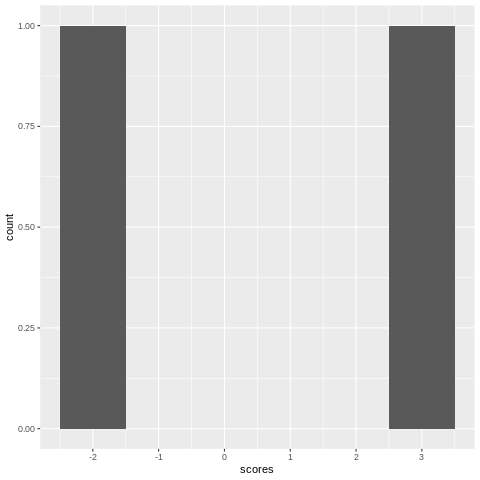

In [ ]:
%%R -o scores
documents <- c(
    "purtroppo oggi sono ricomparsi i dolori allo sterno, è una sensazione orribile",
    "Sono passati 2 giorni dall'intervento e finamente mi sento rinata: ringrazio il dottor Costantini e tutta l'equipe. Il cibo è finalmente tornato a scendere")
scores <- opinionLexiconClassification(
    documents,
    opinion_lexicon$pos_words,
    opinion_lexicon$neg_words,
    2, -2)
print(scores)

### NER and NEL

<img src="https://drive.google.com/uc?id=1sqfqyoxCvN96v80wiHVgm-XmDNSbcc0R" alt="Entity Tagging" width="600"/>

In [ ]:
%%R

##########################################
## Named Entity Recognition and Linking
##########################################


# Define elements for entity tagging
entity_opening_tag <- "<e>"
entity_closing_tag <- "</e>"
types_opening_tag <- "<t>"
types_closing_tag <- "</t>"
class_opening_tag <- "<c>"
class_closing_tag <- "</c>"
wikidata_opening_tag <- "<wd>"
wikidata_closing_tag <- "</wd>"
wikilink_opening_tag <- "<wl>"
wikilink_closing_tag <- "</wl>"
types_separator <- ";"


# Define entity tagging regex pattern
entity_tag_regex_pattern <- paste0(entity_opening_tag, "(.*?)", entity_closing_tag)


#' Build a tag string for entity data.
#'
#' @param entity_id The identifier of the entity
#' @param types The type labels for the entity
#' @param class The macro class of the entity
#' @param wikidata_id The wikidata identier of the entity
#' @param wiki_link The link to the wikipedia page related to the entity
#' @return The entity tag string.
getEntityTag <- function(entity_id, types, class, wikidata_id, wiki_link) {
  paste0(
    entity_opening_tag,
    entity_id,
    types_opening_tag, paste(types, collapse = types_separator), types_closing_tag,
    class_opening_tag, class, class_closing_tag,
    wikidata_opening_tag, wikidata_id, wikidata_closing_tag,
    wikilink_opening_tag, wiki_link, wikilink_closing_tag,
    entity_closing_tag)
}


#' Convert an entity tag to the related data
#'
#' @param entity_tag The entity tag
#' @return The data contained in the entity tag.
entityTagToData <- function(entity_tag) {
  # Split the current entity tag
  entity_data <- strsplit(entity_tag, paste(
    entity_opening_tag,
    types_opening_tag,
    paste0(types_closing_tag, class_opening_tag),
    paste0(class_closing_tag, wikidata_opening_tag),
    paste0(wikidata_closing_tag, wikilink_opening_tag),
    paste0(wikilink_closing_tag, entity_closing_tag),
    sep = "|"))[[1]]
  # Retrieve data
  entity_id <- entity_data[2]
  types <- strsplit(entity_data[3], types_separator)[[1]]
  class <- entity_data[4]
  wikidata_id <- entity_data[5]
  wiki_link <- entity_data[6]
  # Return data
  list(entity_id = entity_id, types = types, class = class, wikidata_id = wikidata_id, wiki_link = wiki_link)
}


#' Convert a list of textual entity tags into a structured dataframe.
#'
#' @param entity_tags The list of entity tags
#' @return The dataframe representation of the entity tags with columns: entity_id, types and class.
entityTagsToDf <- function(entity_tags) {
  # Use rbind to merge the list of dataframes into a single dataframe to return
  do.call("rbind", lapply(entity_tags, function(x) {
    # Split the current entity tag
    entity_data <- entityTagToData(x)
    # Create the dataframe
    data.frame(
      entity_id = entity_data$entity_id,
      types = I(list(entity_data$types)),
      class = entity_data$class,
      wikidata_id = entity_data$wikidata_id,
      wiki_link = entity_data$wiki_link,
      stringsAsFactors = F
    )
  }))
}


#' Get the entity ids from a list of entity tags or the string itself if it does
#' not match with an entity tag. Alternatively, return a default value in case of mismatch.
#'
#' @param entity_tags The list of entity tags
#' @param default_value Optional. The default value to use in case of entity mismatch
#' @return The list of entity ids.
getEntityIdsFromTags <- function(entity_tags, default_value = NULL) {
  unlist(lapply(entity_tags, function(x) {
    if (grepl(entity_tag_regex_pattern, x)) {
      return(entityTagToData(x)$entity_id)
    } else {
      return(if (is.null(default_value)) x else default_value)
    }
  }))
}


#' Get the entity types from a list of entity tags or the string itself if it does
#' not match with an entity tag. Alternatively, return a default value in case of mismatch.
#'
#' @param entity_tags The list of entity tags
#' @param default_value Optional. The default value to use in case of entity mismatch
#' @return The list of entity types.
getEntityTypesFromTags <- function(entity_tags, default_value = NULL) {
  unlist(lapply(entity_tags, function(x) {
    if (grepl(entity_tag_regex_pattern, x)) {
      return(entityTagToData(x)$types)
    } else {
      return(if (is.null(default_value)) x else default_value)
    }
  }))
}


#' Get the entity classes from a list of entity tags or the string itself if it does
#' not match with an entity tag. Alternatively, return a default value in case of mismatch.
#'
#' @param entity_tags The list of entity tags
#' @param default_value Optional. The default value to use in case of entity mismatch
#' @return The list of entity classes.
getEntityClassesFromTags <- function(entity_tags, default_value = NULL) {
  unlist(lapply(entity_tags, function(x) {
    if (grepl(entity_tag_regex_pattern, x)) {
      return(entityTagToData(x)$class)
    } else {
      return(if (is.null(default_value)) x else default_value)
    }
  }))
}


#' Get the entity wikidata ids from a list of entity tags or the string itself if it does
#' not match with an entity tag. Alternatively, return a default value in case of mismatch.
#'
#' @param entity_tags The list of entity tags
#' @param default_value Optional. The default value to use in case of entity mismatch
#' @return The list of entity wikidata ids.
getEntityWikidataIdsFromTags <- function(entity_tags, default_value = NULL) {
  unlist(lapply(entity_tags, function(x) {
    if (grepl(entity_tag_regex_pattern, x)) {
      return(entityTagToData(x)$wikidata_id)
    } else {
      return(if (is.null(default_value)) x else default_value)
    }
  }))
}


#' Get the entity wikipedia links from a list of entity tags or the string itself if it does
#' not match with an entity tag. Alternatively, return a default value in case of mismatch.
#'
#' @param entity_tags The list of entity tags
#' @param default_value Optional. The default value to use in case of entity mismatch
#' @return The list of entity wikipedia links.
getEntityWikiLinksFromTags <- function(entity_tags, default_value = NULL) {
  unlist(lapply(entity_tags, function(x) {
    if (grepl(entity_tag_regex_pattern, x)) {
      return(entityTagToData(x)$wiki_link)
    } else {
      return(if (is.null(default_value)) x else default_value)
    }
  }))
}


#' Tag in an unsupervised way the entities that match with the patterns recognized by NER (precalculated results).
#' Each matched text used by the NER for tagging entity, if detected, is replaced with the reconciled entitity tag.
#'
#' @param reconciled_entities The entity dictionary to use
#' @param text The dataframe with the text column to tag
#' @param stopwords The stopwords to remove from entity tagging
#' @return The tagged text
tagEntities <- function(reconciled_entities, text, stopwords) {

  tagged_text <- text # Complete entity tagging
  id_tagged_text <- text # Matched text replaced with entity id
  
  # Replace each matchable word inside documents with the related entity tag
  entity_tagging_pb <- progress_bar$new(total = nrow(reconciled_entities))
  
  # For each detected entity...
  apply(reconciled_entities, 1, function(x) {
    
    # Check the words that were used to recognize it
    # Note: use unique in the case that the entity id is equal to a matched text
    words_to_replace <- unique(c(gsub("_", " ", x$entity_id), x$matched_texts))
    
    # Remove stopwords from the matchable words in order to reduce false positives
    words_to_replace <- words_to_replace[!(words_to_replace %in% stopwords)]
    
    # Define the regex pattern to research for entity tag replacement
    # '\b' matches between a word character and a non-word character (word boundary)
    # The '\b' prefix and suffix allows a search for exact words
    # '(?<!...)' uses lookbehind to avoid word boundary matches that starts with entity tag
    # (ensures no matches inside entity id texts already replaced)
    # Replace dots with a form having escaping characters in order to avoid "any character" special mean
    words_to_replace_pattern <- paste(
      lapply(words_to_replace, function(word) paste0("\\b(?<!", entity_opening_tag, ")", gsub(".", "\\.", word, fixed = T), "\\b")),
      collapse = "|")
    
    # Define the entity tag as the replacement string
    # Keep a space before and after an entity tag in order to simplify parsing
    replacement <- paste0(" ", getEntityTag(x$entity_id, x$labels, x$class, x$wikidata_id, x$wiki_link), " ")
    
    # Substitute occurrences in the original documents containing the concept
    # '<<-' operator allows an update on the variable defined in the parent environment
    # (instead considering a function-local copy)
    # Use stringi because is more efficient then gsub with large data
    if (words_to_replace_pattern != "") {
      tagged_text <<- stringi::stri_replace_all_regex(
        tagged_text,
        words_to_replace_pattern,
        replacement
      )
      id_tagged_text <<- stringi::stri_replace_all_regex(
        id_tagged_text,
        words_to_replace_pattern,
        x$entity_id
      )
    }
    
    # Upgrade progress bar
    entity_tagging_pb$tick()
    
  })
  
  list(
    tagged_text = tagged_text,
    id_tagged_text = id_tagged_text)
  
}

<font color="green"> NER and NEL Test </font>

In [ ]:
%%R
tagged_text <- tagEntities(reconciled_entities, "mi sono operato a roma", stopwords)
tagged_text_2 <- tagEntities(reconciled_entities, "ho difficolta con l'acqua frizzante", stopwords)
print(tagged_text)
print(tagged_text_2)

$tagged_text
[1] "mi sono operato a roma"

$id_tagged_text
[1] "mi sono operato a roma"

$tagged_text
[1] "ho difficolta con l' <e>acqua_gassata<t>Beverage;Food</t><c>Food</c><wd>Q264554</wd><wl>http://it.wikipedia.org/wiki/Acqua_gassata</wl></e> "

$id_tagged_text
[1] "ho difficolta con l'acqua_gassata"



### Term-document matrix

#### Lemmatization

In [ ]:
# Download italian resources for lemmatization
!pip install spacy
!python -m spacy download it

✔ Download and installation successful
You can now load the model via spacy.load('it_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/it_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/it
You can now load the model via spacy.load('it')


In [ ]:
import spacy
import re

# Initialize spacy 'it' model, keeping only tagger component (for efficiency)
nlp_it = spacy.load('it', disable=['parser', 'ner'])
nlp_en = spacy.load('en', disable=['parser', 'ner'])

@ri.rternalize
def lemmatize(doc, lang, pattern_to_ignore = None):
	lemmatized_words = []
	nlp = nlp_it if (lang[0] == "it") else nlp_en
	if pattern_to_ignore is not None:
		pattern = re.compile(pattern_to_ignore[0])
	for word in doc[0].split(" "):
		word_res = nlp(word)
		lemmatized_words.append(word if ((pattern_to_ignore is not None and pattern.match(word)) or len(word_res) == 0) else word_res[0].lemma_)
	lemmatized_doc = " ".join(lemmatized_words)
	return robjects.StrVector([lemmatized_doc])

<font color="green"> Lemmatization Test </font>

In [ ]:
%%R -i lemmatize
lemmatize("facciamo una prova", "it")

[1] "fare una provare"


#### Tdm Construction

In [ ]:
%%R -i lemmatize

##########################################
## Term-document matrix
##########################################


#' Build a term document matrix from textual documents
#'
#' @param documents The document dataframe with "doc_id" and "text" columns
#' @param stopwords The string array of stopwords to delete
#' @param lang The corpus language
#' @param lemmatizeYN True if you want to lemmatize the document for tdm construction, False otherwise
#' @return The term document matrix after sparse features removal, and the vocabulary
buildCompleteTdm <- function(documents, stopwords, lang, lemmatizeYN = FALSE) {
  
  # Build the corpus from the documents
  documents_corpus <- tm::Corpus(tm::DataframeSource(documents))
  
  # Apply transformations to all the documents in the corpus
  # STEP 1 - Lowercasing
  documents_corpus <- tm::tm_map(documents_corpus, tm::content_transformer(tolower))
  # STEP 2 - Punctuation replacement
  # To work around the default behavior of removePunctuation() that joines single words separated
  # by punctuation in case of blank space lacking between them, creates a custom function that
  # replaces than removes punctuation characters
  # Source: https://bit.ly/38cncT2
  replacePunctuationExceptEntityTags <- function(x) {
    # Replace all punctuation with a blank space, except for entity tags
    # The \\1 sintax refers to the first group (...) and means 'whatever was matched
    # replace it with that'. Having only entity tags pattern in a group, each time
    # an entity is detected \\1 will replace it by the same value (so it keeps them here)
    # The space inside the replacement string avoid terms union
    gsub(paste0("(", entity_tag_regex_pattern, ")|[[:punct:]]+"), "\\1 ", x)
  }
  documents_corpus <- tm::tm_map(documents_corpus, replacePunctuationExceptEntityTags)
  # STEP 3 - Numbers removal
  replaceNumberExceptEntityTags <- function(x) {
    gsub(paste0("(", entity_tag_regex_pattern, ")|[[:digit:]]+"), "\\1 ", x)
  }
  documents_corpus <- tm::tm_map(documents_corpus, replaceNumberExceptEntityTags)
  # STEP 4 - Extra whitespace removal
  documents_corpus <- tm::tm_map(documents_corpus, tm::stripWhitespace)
  # STEP 5 - Stopwords removal
  # Remove stopwords considering also spaces as word separator
  removeWordsBySpaceSep <- function(messages, words) {
    lapply(messages, function(x) {
      x <- unlist(strsplit(x, " "))
      x <- x[!x %in% words]
      paste(x, collapse = " ")
    })
  }
  documents_corpus <- tm::tm_map(documents_corpus, removeWordsBySpaceSep, stopwords)
  if (lemmatizeYN) {
    # Lemmatization
    lemmatizeCorpus <- function(messages, lang, entity_tag_regex_pattern = NULL) {
      lapply(messages, function(x) {
        x <- lemmatize(x, lang, entity_tag_regex_pattern)
      })
    }
    documents_corpus <- tm::tm_map(documents_corpus, lemmatizeCorpus, lang, entity_tag_regex_pattern)
    # Alternative lemmatization only for english text
    # corpus <- tm_map(corpus, textstem::lemmatize_strings)
  }
  
  # Extract a term-document matrix from the documents corpus
  tdmc <- tm::TermDocumentMatrix(documents_corpus)
  
  tdmc
  
}


#' Remove terms (features) below a certain document frequency threshold,
#' distinguishing between standard and entity (if present)
#'
#' @param tdmc The complete term-document matrix
#' @param entitiesYN True if entity terms are present, false otherwise
#' @param min_standard_term_freq The minimum value of a standard feature's document frequency expressed as percentage
#' (term frequencies divided by the total sum; i.e. 0.01 -> at least 1%)
#' @param min_entity_term_freq The minimum value of an entity feature's document frequency expressed as percentage
#' (term frequencies divided by the total sum; i.e. 0.001 -> at least 0.1%)
#' @return The term-document matrix after sparse features removal, and the vocabulary
removeSparseFeatures <- function(tdmc, entitiesYN = TRUE,
                                 min_standard_term_freq, min_entity_term_freq) {
  
  # STEP 1 - FROM TDM TO DFM QUANTEDA CONVERSION
  # ----------------
  
  # Create a document-feature matrix (quanteda) for the term-document matrix (tm)
  # A dfm has documents on the rows and features on the columns (instead of tdm)
  # This is helpful for quanteda analysis
  documents_dfm <- as.dfm(tdmc)
  
  # STEP 2 - STANDARD AND ENTITY TERMS SEPARATION
  # ----------------
  
  # Create a dfm with only standard terms as features
  standard_terms_dfm <- documents_dfm %>%
    dfm_select(
      pattern = entity_tag_regex_pattern,
      selection = "remove",
      valuetype = "regex")
  
  if (entitiesYN) {
    # Create a dfm with only entity terms as features
    entity_terms_dfm <- documents_dfm %>%
      dfm_select(
        pattern = entity_tag_regex_pattern,
        selection = "keep",
        valuetype = "regex")
  }
  
  # STEP 3 - SPARSE FEATURES REMOVAL
  # ----------------
  
  # Standard terms and entity terms have different thresholds
  # Some important types of entities (releavant for the analysis) extracted by NER have a low
  # frequency within the documents: normally the entity removal threshold is therefore less rigid
  # (entities are not eliminated even if they are infrequent)
  
  # Remove the standard terms that appear in less than a certain percentage of the documents
  # Typically to use LSA every word should appear in at least 2 documents
  standard_terms_dfm <- standard_terms_dfm %>%
    dfm_trim(min_docfreq = min_standard_term_freq, docfreq_type = "prop")
  
  if (entitiesYN) {
    # Remove the entity terms that appear in less than a certain percentage of the documents
    entity_terms_dfm <- entity_terms_dfm %>%
      dfm_trim(min_docfreq = min_entity_term_freq, docfreq_type = "prop")
  }
  
  # STEP 4 - FINAL DFM CONSTRUCTION
  # ----------------
  
  if (entitiesYN) {
    # Combine the two document-feature matrixes (same documents but concatenated features)
    # NOTE: duplicated features are not possible (a term related to an entity is always recognized as entity
    # thanks to the reconciliation phase)
    options(warn = -1)
    documents_dfm <- cbind(standard_terms_dfm, entity_terms_dfm)
    options(warn = 0)
  } else {
    documents_dfm <- standard_terms_dfm
  }
  
  # STEP 5 - FROM DFM TO TDM CONVERSION
  # ----------------
  
  # A DocumentFeatureMatrix cannot be easily translated into a TermDocumentMatrix (tm)
  # So it is converted in a DocumentTermMatrix (tm)
  dtms <- quanteda::convert(documents_dfm, to = "tm")
  
  # Convert tdms to standard R format
  tdm <- t(as.matrix(dtms))
  
  # VOCABULARY EXTRACTION
  # -------------------------------------------------
  
  # Save the array with the selected terms (extracts the vocabulary)
  terms <- rownames(tdm)
  
  if (entitiesYN) {
    
    # Extract the terms without their NER type tag
    terms_without_tag <- getEntityIdsFromTags(terms)
    entity_terms_without_tag <- getEntityIdsFromTags(colnames(entity_terms_dfm))
    
    # Extract the terms types related to the NER for each selected term
    terms_types <- getEntityTypesFromTags(terms, NA)
    
    # Extract the terms class related to the NER for each selected term
    terms_classes <- getEntityClassesFromTags(terms, NA)
    
  }
  
  list(tdm = tdm,
       dfm = documents_dfm,
       st_dfm = standard_terms_dfm,
       et_dfm = entity_terms_dfm,
       voc = list(
         terms = terms,
         terms_without_tag = terms_without_tag,
         entity_terms_without_tag = entity_terms_without_tag,
         terms_types = terms_types,
         terms_classes = terms_classes))
  
}


#' Apply term weighting to a term document matrix
#'
#' @param tdm The term-document matrix
#' @param mode The type of term weighting to apply
#' @return The term-document matrix after term weighting
applyTermWeightingToTdm <- function(tdm, mode = "unsupervised") {
  
  if (!(mode %in% c("unsupervised", "supervised"))) {
    stop("Not valid term weighting mode")
  }
  
  if (mode == "unsupervised") {
    
    # Weight terms in term-doc matrix according to the entropy-based tf-idf variant
    # Apply two factors in order to improve the information content
    # 1) a local factor on the terms of the same doc
    # 2) a global factor: the terms that appears in many documents have a low information content
    lw_logtf(tdm) * (1 - entropy(tdm))
    
  } else if (mode == "supervised") {
    
    # <implement your version here as exercise if you want/>
    
  }
  
  
}


#' Apply term weighting to a document vector based on a term-document matrix
#'
#' @param doc_vec The document vector
#' @param tdm The term document matrix
#' @return The document vector after term weighting
applyTermWeightingToDocument <- function(doc_vec, tdm) {
  
  lw_logtf(doc_vec) * (1 - entropy(tdm))

  # <implement another version here as above if you want/>
  
}

<font color="green"> Tdm Construction Test </font>

In [ ]:
%%R -i documents

tdm <- buildCompleteTdm(documents, stopwords, lang, lemmatizeYN = T)
print(tdm)
rtdm <- removeSparseFeatures(tdm, entitiesYN = TRUE,
                             min_standard_term_freq = 0.001, min_entity_term_freq = 0.0001)
print(nrow(rtdm$tdm))
print(ncol(rtdm$tdm))

<<TermDocumentMatrix (terms: 4486, documents: 2838)>>
Non-/sparse entries: 32776/12698492
Sparsity           : 100%
Maximal term length: 210
Weighting          : term frequency (tf)
[1] 1855
[1] 2838


### LSA

In [ ]:
%%R

##########################################################################
## Custom lsa_0.73.1 query implementation
## ---------------
## Avoids symbol replacements in order to use also tagged terms
##########################################################################

query <- function( qtext, termlist, stemming=FALSE, language="german" ) {
    
    # qtext: string with the query words, whitespace separated
    # termlist: list of allowed terms
    # dtm: original doc-term-matrix (no weighting applied!)
    
    dtm = NULL
    
    q = strsplit( gsub('[[:space:]]+', ' ', tolower(qtext) ), " ")[[1]]
    vec = vector( mode="numeric", length(termlist) )
    for ( word in q ) {
        if (stemming) word = wordStem(word, language)
        if (word != "") {
            vec[ match(word,termlist) ] = vec[ match(word,termlist) ] + 1
        }
    }
    
    dtm = as.matrix(vec)
    colnames(dtm) = toupper(qtext)
    rownames(dtm) = termlist
    
    environment(dtm) = new.env()
    class(dtm) = "textmatrix"
    
    return ( dtm )
    
}

In [ ]:
%%R


##########################################
## Utility functions for LSA
##########################################


#' Perform a normalization (to unit vector conversion) of each row of a dataframe
#'
#' @param x The dataframe with unnormalized vectors as rows
#' @return The dataframe with normalized vectors as rows
normRows <- function(x) x / apply(x, 1, norm, "2")


#' Replace each item of a numeric vector with the difference with the previous one
#'
#' @param x The numeric vector
#' @return The numeric vector after the computation of the difference between
#' each item and the previous one
fordiff <- function(x) x[2:length(x)] - x[1:(length(x) - 1)]


#' Detect the local minimums in a numeric vector
#'
#' @param x The numeric vector
#' @return The local minimums of the x
minimums <- function(x) which(x - data.table::shift(x, 1) < 0
                              & x - data.table::shift(x, 1, type = 'lead') < 0)


#' Calculate the cosine similarities between a vector and each row of a matrix
#'
#' @param x The matrix
#' @param q The vector
#' @return The vector with the cosine similarities
cosines <- function(x, q) apply(x, 1, cosine, as.vector(q))


#' Get the highest n values of a vector
#'
#' @param x The vector
#' @param n The number of top item to consider
#' @return The top n items inside x
top <- function(x, n) order(x, decreasing = TRUE)[1:n]


#' Perform LSA on a term-document matrix and with a specific target dimensionality 
#'
#' @param tdm The term-document matrix
#' @param alg The algorithm to use
#' - lsa, standard LSA based on SVD
#' - rsvd, Fast Randomized Singular Value Decomposition
#' (https://github.com/erichson/rSVD#:~:text=Fast%20Randomized%20Singular%20Value%20Decomposition,data%20sets%20with%20high%20accuracy.)
#' @param k Optional, the number of dimensions for the lantent space
#' @return The LSA matrices and intermediate results for similarity calculation
performLSA <- function(tdm, alg, k = 100) {
  
  if (!(alg %in% c("lsa", "rsvd"))) {
    stop("Not valid algorithm")
  }
  
  start_time <- Sys.time()
  
  if (alg == "lsa") {
    
    # Decompose the term document matrix using the lsa function
    # Executes the SVD and makes the matrix with a reduced number of dimensions calculated automatically
    # - tk matrix with terms' vectors (U)
    # - sk diagonal matrix (Sigma)
    # - dk matrix with documents' vectors (V)
    # If k is not specified, it automatically choses the rank with an heuristic
    options(warn = -1)
    lsam <- if (is.null(k)) lsa(tdm) else lsa(tdm, dims = k)
    options(warn = 0)
    
  } else if (alg == "rsvd") {
    
    # A fast probabilistic algorithm that can be used to compute the near optimal low-rank
    # singular value decomposition of massive data sets with high accuracy.
    # The key idea is to compute a compressed representation of the data to capture the essential information.
    # This compressed representation can then be used to obtain the low-rank svd.
    # If k is not specified, use the number of columns (documents) in the tdm 
    
    lsam <- if (is.null(k)) rsvd(tdm) else rsvd(tdm, k = k)
    names(lsam) <- c("sk", "tk", "dk")
    
  }
  
  # Calculate U * Sigma^1/2
  tksrs <- lsam$tk %*% diag(sqrt(lsam$sk))
  rownames(tksrs) <- rownames(tdm)
  
  # Calculate the matrices with the positions of the terms and the documents in the latent space
  tls <- lsam$tk %*% diag(lsam$sk)
  dls <- lsam$dk %*% diag(lsam$sk)
  
  # Normalize the vectors with the positions of terms and documents (length 1)
  tlsn <- normRows(tls)
  dlsn <- normRows(dls)
  
  end_time <- Sys.time()
  
  list(lsam = lsam, tksrs = tksrs, tls = tls, dls = dls, tlsn = tlsn, dlsn = dlsn,
       computation_time = end_time - start_time)
  
}


#' Find the minimums inside the curvature function for the eigenvector distribution.
#'
#' @param sk The eigenvalues
#' @param search_range The range to consider for the research
#' @return the minimums in the curvature function
findLSASkMins <- function(sk, search_range = 1:20) {
  
  # Detect the knee point in the sequence of eigenvalues between the local mins of the
  # curvature function
  skd <- fordiff(sk)
  skdd <- fordiff(skd)
  skcurv <- skdd[search_range] / (1 + (skd[search_range]) ^ 2) ^ 1.5
  plot(search_range, skcurv, type="b")
  
  # Detect minimums in the curvature function (sequence of eigenvalues)
  minimums(skcurv)
  
}


#' Find the N documents semantically closest to a query.
#'
#' @param texts The textual content of the documents
#' @param dls The documents' coordinates in the latent semantic space
#' @param lsa_dims The dimensions of the latent semantic space
#' @param query_ls The query object (new dummy document) embedding
#' @param n The number of nearest documents to search
#' @return the textual content of the nearest documents
findTopNearestDocuments <- function(texts, dls, lsa_dims, query_ls, n = 10) {
  texts[top(
    cosines(dls[, lsa_dims], query_ls[lsa_dims]),
    n)]
}


#' Calculate and sort term norms.
#'
#' @param terms The string array for term labels
#' @param term_vectors The matrix with the array representation of each term
#' @param lsa_dims The dimensions to consider
#' @return term norms in descending order
getOrderedTermNorms <- function(terms, term_vectors, lsa_dims = NULL) {
  
  if (is.null(lsa_dims)) {
    lsa_dims = 1:ncol(term_vectors)
  }
  
  # Calculates the norm of the terms in the latent space
  term_norms <- apply(term_vectors[,lsa_dims], 1, norm, "2")
  term_norms <- data.frame(term = terms, norm = term_norms, row.names = NULL)
  
  # Sorts decreasingly terms in the selected dimensions of the latent space by their norm
  term_norms <- orderBy(~-norm, term_norms)
  
  term_norms
  
}


#' Perform all the preliminary operations for the calculation of the similarity
#' between a query and the terms in the latent space
#'
#' @param q The query (a set of key words to research in the documents)
#' @param tdm The term document matrix
#' @param termWeightingDocFun The term weighting function to apply on the binary query
#' @param lsam The LSA matrix decomposition after SVD
#' @return The original string query (q),
#' the binary query document in the latent space (bin_q),
#' the query document after tf-idf weighting (w_q),
#' the query document in the latent space (ls_q = dls = V * Sigma) and its normalization (lsn_q),
#' the query document equivalent to V matrix rows (dk = V),
#' the V * Sigma^1/2 element for semantic similarity calculation between query and terms (dksrs)
makeQuery <- function(q, tdm, termWeightingDocFun, lsam) {
  
  # THEORY
  # uk * sigmak * vk_t
  # -> uk (U) = matrix terms x latent variables
  # -> vk (V) = matrix documents x latent variables
  
  # LSA PACKAGE
  # lsam$tk * lsam$sk * lsam$dk
  # -> lsam$tk = uk (U)
  # -> lsam$dk = vk (V)
  # -> dls = lsam$dk %*% diag(lsam$sk) = vk * sigmak = V * Sigma
  
  # Create the query vector (binary vector)
  # Transform the query in a vector representing the presence/absence
  # of each term of the bag of words representation
  bin_q <- query(q, rownames(tdm))
  
  # The query is like a new document to add to the latent space
  # So it applies all the transformations made to those already inside
  # (term weighting, normalization) in order to fold it into the LSA space
  # The query vector is now equivalent to a column of tdm matrix
  w_q <- termWeightingDocFun(bin_q, tdm)
  
  # Calculate the position of the query in the latent space (V * Sigma)
  ls_q <- t(w_q) %*% lsam$tk
  
  # Calculate the normalized query vector in latent space for visualization purposes
  lsn_q <- normRows(ls_q)
  
  # Transform the query vector in a new document (row of V matrix)
  # q_k = q^T * U_k * Sigma_k^-1
  dk <- ls_q %*% diag(lsam$sk ^ -1)
  
  # The similarity between a query and some terms is calculated as a cosine similarity
  # considering the V representation for the query and the terms vectors multiplicated
  # by Sigma^1/2.
  # cosine(V * Sigma^1/2, U * Sigma^1/2) = cosine(dk %*% diag(sqrt(lsam$sk), lsam$tk %*% diag(sqrt(lsam$sk)))
  # dksrs is so one of the two necessary elements for similarity calculation
  dksrs <- dk %*% diag(sqrt(lsam$sk))
  
  # Return a named list with the results
  list(q = q, bin_q = bin_q, w_q = w_q, ls_q = ls_q, lsn_q = lsn_q, dk = dk, dksrs = dksrs)
  
}


#' Fold-in a custom textual document in a latent semantic space.
#' Apply the same transformation strategy applied to original documents.
#' unlike a query, the document is not necessarily composed only of the dictionary terms,
#' but is a text freely expressed by a user (similar to a new post).
#'
#' @param doc The custom textual document
#' @param preprocessingDocFun The preprocessing function to apply to the document before the fold-in
#' @param termWeightingDocFun The term weighting function to apply on the binary query
#' @param tdm The term document matrix to enrich
#' @param lsam The latent semantic space on which perform document fold-in
#' @return The document, its binary vector representation, its weighted vector, its position in the latent space,
#' its normalized position for visualization purposes, the component for similarity calculation
makeUserQuery <- function(doc, preprocessingDocFun, termWeightingDocFun, tdm, lsam) {
  
  # Performs document-level preprocessing
  doc <- preprocessingDocFun(doc)
  
  # Custom document fold-in
  makeQuery(doc, tdm, termWeightingDocFun, lsam)
  
}


#' Calculate the correlation between a query and a class inside a latent space,
#' using chi-square test
#'
#' @param q The query to consider for correlation
#' @param tdm The term document matrix
#' @param lsa The LSA decomposition after SVD
#' @param dls The documents' positions in the latent space
#' @param lsa_dims The LSA dimensions to consider
#' @param class The class to consider for correlation
#' @param doc_classes The classes related to each document of the entire dataset
#' @param debug Boolean. True to display detailed output for each chisquared test, False otherwise.
#' @return The chi-square result for the correlation between q and class, and the query object
#' Prints on standard output the contingency table, the expected number of related documents
#' and the observed one
calculateQueryClassCorrelationLSA <- function(q, tdm, termWeightingDocFun, lsam, dls, lsa_dims, class, doc_classes, debug = F) {
  
  # Converts the query as a document in the LSA space (query document)
  qd <- makeQuery(q, tdm, termWeightingDocFun, lsam)
  
  # Calculates the number of occurrences of the target class between all classes
  # It fixes the maximum number of results returned from the ranking-based semantic search model
  class_count <- sum(doc_classes == class)
  
  # Verifies objectively if there is a semantic correlation between the query and the class
  # In the latent space, the documents considered could also not contain the terms inside the query
  # but terms semantically related to them
  
  # Builds the contingency table
  q.vs.class <- base::table(1:nrow(dls) %in% top(cosines(dls[, lsa_dims], qd$ls_q[lsa_dims]), class_count),
                            doc_classes == class)
  dimnames(q.vs.class) <- list(q = c("No", "Yes"), class = c("No", "Yes"))
  
  # Performs a chi-squared test between the query and the class
  chisqtest <- chisq.test(q.vs.class, correct = FALSE)
  
  if (debug) {
    print(as.character(q))
    print(q.vs.class)
    cat('Expected: ', chisqtest$expected, "\n")
    cat('Observed: ', chisqtest$observed, "\n")
  }
  
  list(chisqtest = chisqtest, query = qd)
  
}


#' Perform a greedy descriptive analysis for a certain class in the latent space.
#' If specified, start from a certain query document; otherwise start from the most representative term
#' with high norm for the opinion class to analyze.
#'
#' @param tdm The term-document matrix
#' @param termWeightingDocFun The term weighting function to apply on the binary query
#' @param lsa_data The data resulting from the application of LSA
#' @param lsa_dims The LSA dimensions to consider during the analysis
#' @param starting_query Optional. The query document from which start the analysis
#' @param term_norm_threshold The minimum norm for a relevant term
#' @param class The class for which build a description
#' @param doc_classes The class of each document
#' @param min_similarity_closeness The minimum value for cosine similarity that must be satisfied during step-by-step analysis
#' @param n_semantically_closest_terms The number of semantically closest terms to consider during step-by-step analysis
#' @param max_pvalue_threshold The minimum pvalue that must be satisfied by a class description
#' @return The list with the results of the descriptive analysis:
#' - The description for the opinion class in original language (cd) and in english (cd_en)
#' - The p-value score related to the opinion class description (pvalue)
#' - The position of the opinion class description document in the latent space (ls)
#' - The normalized position of the opinion class description document in the latent space (lsn)
descriptiveAnalysisLSA <- function(tdm,
                                   termWeightingDocFun,
                                   lsa_data, lsa_dims,
                                   starting_query = NULL,
                                   term_norm_threshold = NULL,
                                   class, doc_classes,
                                   min_similarity_closeness,
                                   n_semantically_closest_terms,
                                   max_pvalue_threshold) {
  
  term_norms <- getOrderedTermNorms(rownames(tdm), lsa_data$tls, lsa_dims)
  
  if (is.null(starting_query)) {
    
    # The starting query document is not specified...
    
    # For each term with an high norm, perform a chi-squared test
    # in order to verify the correlation (low p-value) between the term and the class
    high_norm_terms <- term_norms %>% filter(norm > term_norm_threshold)
    high_norm_terms_chisqtest_class <- lapply(
      high_norm_terms$term,
      function(q) calculateQueryClassCorrelationLSA(
        q, tdm, termWeightingDocFun, lsa_data$lsam, lsa_data$dls, lsa_dims, class, doc_classes))
    high_norm_terms_chisqtest_class <- data.frame(
      term = high_norm_terms$term,
      norm = high_norm_terms$norm,
      pvalue = unlist(
        lapply(lapply(high_norm_terms_chisqtest_class, `[[`, "chisqtest"), `[[`, "p.value"),
        use.names = FALSE),
      # The I marker allows the creation of a dataframe without a new column for each coordinate
      # but with only one vector column
      ls = I(lapply(lapply(high_norm_terms_chisqtest_class, `[[`, "query"), `[[`, "ls_q")),
      lsn = I(lapply(lapply(high_norm_terms_chisqtest_class, `[[`, "query"), `[[`, "lsn_q")),
      dksrs = I(lapply(lapply(high_norm_terms_chisqtest_class, `[[`, "query"), `[[`, "dksrs"))
    )
    
    # Order high norm terms from those most correlated with the opinion_class to those less correlated
    high_norm_terms_chisqtest_class <- orderBy(~pvalue, high_norm_terms_chisqtest_class)
    
    # Select the high norm term with the lowest pvalue as the starting one
    top_pvalue_term <- head(high_norm_terms_chisqtest_class, 1)
    top_pvalue_term <- list(
      text = as.character(top_pvalue_term$term[[1]]),
      pvalue = top_pvalue_term$pvalue[[1]],
      ls = top_pvalue_term$ls[[1]],
      lsn = top_pvalue_term$lsn[[1]],
      dksrs = top_pvalue_term$dksrs[[1]]
    )
    
    # Initialize class description query data with top pvalue term data
    class_description_query <- top_pvalue_term
    
  } else {
    
    # The starting query document is already specified...
    
    # Calculate the correlation between the starting query document and the class
    sq_chisqtest_class <- calculateQueryClassCorrelationLSA(
      starting_query, tdm, termWeightingDocFun, lsa_data$lsam, lsa_data$dls, lsa_dims, class, doc_classes)
    sq <- list(
      text = starting_query,
      pvalue = (sq_chisqtest_class[["chisqtest"]])[["p.value"]],
      ls = (sq_chisqtest_class[["query"]])[["ls_q"]],
      lsn = (sq_chisqtest_class[["query"]])[["lsn_q"]],
      dksrs = (sq_chisqtest_class[["query"]])[["dksrs"]]
    )
    
    # Initialize the class description query
    class_description_query <- sq
    
  }
  
  analysis_finished <- FALSE
  while (!analysis_finished) {
    
    # VISUAL (R-PRECISION)
    
    # Remove from U * Sigma^1/2 the previously selected terms for opinion_class description 
    # in order to not select them again
    tksrs_ncd <- lsa_data$tksrs[!(rownames(lsa_data$tksrs) %in% unlist(base::strsplit(class_description_query$text, " "))), ]
    
    # Calculate the semantic similarity between the query and the terms, and order them
    # cosine(V * Sigma^1/2, U * Sigma^1/2)
    # cosine between -1 and 1 because the vector space also includes the negative quadrants
    closeness_terms_ranking <- sort(
      cosines(tksrs_ncd[, lsa_dims], class_description_query$dksrs[lsa_dims]),
      decreasing = TRUE)
    
    # Select the N semantically nearest terms that satisfy a minimum closeness threshold
    nearest_terms <- names(
      head(
        closeness_terms_ranking[closeness_terms_ranking > min_similarity_closeness],
        n_semantically_closest_terms))
    
    # Sort the nearest terms by norm length descending order
    nearest_terms_norms <- dplyr::filter(term_norms, term %in% nearest_terms)
    nearest_terms_norm_ranking <- orderBy(~-norm, nearest_terms_norms)
    
    # Navigate the nearest terms from the one with the highest norm to the one with the lowest norm
    # The first met term with a sufficient low pvalue is used for the query extension
    # representing the class description
    new_term_chisqtest <- NULL
    i <- 1
    while (is.null(new_term_chisqtest) && i <= length(nearest_terms)) {
      
      # Create the new query temp (class description)
      new_class_description <- paste(class_description_query$text, as.character(nearest_terms[[i]]))
      
      # Calculate the correlation between the new class description and the class
      near_term_chisqtest <- calculateQueryClassCorrelationLSA(
        new_class_description, tdm, termWeightingDocFun, lsa_data$lsam, lsa_data$dls, lsa_dims, class, doc_classes)
      
      # Get the pvalue of the chisquared test
      near_term_pvalue <- (near_term_chisqtest[["chisqtest"]])[["p.value"]]
      
      # Check if the pvalue is low enough
      if (near_term_pvalue < max_pvalue_threshold) {
        new_term_chisqtest <- near_term_chisqtest
      }
      
      # Go to the next nearest term with a lower norm
      i <- i + 1
      
    }
    
    if (is.null(new_term_chisqtest)) {
      # If no one of the nearest terms (independently by their norm) has a pvalue low enough
      # stops the descriptive analysis (class description completed)
      analysis_finished <- TRUE
    } else {
      # Update class data with the selected term
      class_description_query <- list(
        text = (new_term_chisqtest[["query"]])[["q"]],
        pvalue = (new_term_chisqtest[["chisqtest"]])[["p.value"]],
        ls = (new_term_chisqtest[["query"]])[["ls_q"]],
        lsn = (new_term_chisqtest[["query"]])[["lsn_q"]],
        dksrs = (new_term_chisqtest[["query"]])[["dksrs"]]
      )
      
    }
    
  }
  
  class_description_query
  
}

#' Calculate the top-N semantic adjacencies for each term in the latent space,
#' above a certain similarity threshold.
#' With the same similarity, priority is given to adjacent terms with higher norms.
#'
#' @param tls The coordinates of the terms in the latent space
#' @param lsa_dims The LSA dimensions to consider
#' @param terms The term labels
#' @param term_norms The vector with the 2-norm of each term
#' @param top_n The number of neighbors to research for each term
#' @param min_similarity The minimum similarity for a top-N closest term to be considered adjacent
#' @return
#' - the adjacency matrix
#' - a list of list containing the top-N terms above threshold semantically related to each term
calculateRelevantAdjacencies <- function(tls, lsa_dims, terms, term_norms,
                                         top_n = 20, min_similarity = .95) {
  
  # 1) COSINE SIMILARITY IN [0,1]
  # ----------------------------------
  
  # Calculates an adjacency matrix with the cosine similarity between each pair of term
  adj_matrix <- cosineSim(t(tls[, lsa_dims]))
  
  # Remaps cosine similarity values to [0, 1] range
  adj_matrix <- base::apply(adj_matrix, 1:2, function(x) changeRange(x, -1, 1, 0, 1))
  
  # Use term labels for adjacency matrix rownames
  rownames(adj_matrix) <- terms
  
  # Converts the distance matrix to a named list of dataframe with term, similarity and norm columns
  adj_list <- lapply(seq_len(ncol(adj_matrix)), function(i) {
    df <- as.data.frame(as.table(adj_matrix[, i]))
    colnames(df) <- c("term", "similarity")
    df$norm <- term_norms
    df
  })
  names(adj_list) <- rownames(adj_matrix)
  
  # Keeps only the relevant adjacencies for each term
  rel_adj_list <- lapply(seq_along(adj_list), function(i) {
    df <- adj_list[[i]]
    current_term <- names(adj_list)[[i]]
    # Removes the term itself from dataframe rows
    df <- df[!(df$term == current_term), ]
    # Orders each dataframe inside the list by cosine similarity and norm
    # (in case of equal similarity)
    sorted_df <- df[with(df, order(-similarity, -norm)), ]
    # Keeps the first N terms
    top_n_df <- head(sorted_df, top_n)
    # Deletes neighbor terms without a sufficient similarity
    top_n_high_correlation_df <- filter(top_n_df, similarity > min_similarity)
    top_n_high_correlation_df
  })
  names(rel_adj_list) <- rownames(adj_matrix)
  
  # Keeps only terms which have at least one relevant adjacency
  rel_adj_list <- rel_adj_list[lapply(rel_adj_list, nrow) > 0]
  
}

<img src="https://drive.google.com/uc?id=1h2Mp7H4GFRhVoHSAwE0U0xb8GPIsBZGH" alt="Entity Tagging" width="500"/>

### Gold standards

In [ ]:
%%R

##########################################
## Evaluation based on Gold Standards
##########################################


#' Filter only terms with known correlations that are in the vocublary and get their indexes.
#' For this check purpose considers only terms' labels (their ids, without the eventual entity tag form).
#' Id refers to the reference name for the term.
#'
#' @param known_correlations Known terms correlations (expressed by terms' ids):
#' list of items with id, doc_1, doc_2, and correlation category
#' @param term_labels The complete labels for the terms inside the vocabulary
#' @return The indexes for the detectable correlations according to the vocabulary
knownCorrelationsToIdxs <- function(known_correlations, term_labels) {
  
  known_correlations_idxs <- apply(
    known_correlations, 1,
    function(kc) {
      doc_1_idxs <- kc$doc_1 %>% .[. %in% term_labels] %>% map(function(t) which(term_labels == t))
      doc_2_idxs <- kc$doc_2 %>% .[. %in% term_labels] %>% map(function(t) which(term_labels == t))
      if (length(doc_1_idxs) > 0 & length(doc_2_idxs) > 0) {
        list(id = kc$id, doc_1 = doc_1_idxs, doc_2 = doc_2_idxs, category = kc$category)
      } else {
        NA
      }
    })
  
  known_correlations_idxs
  
}


#' Calculate the indexes for the detectable positive and negative gold standards.
#'
#' @param kc_pos All positive gold standards
#' @param kc_neg All negative gold standards
#' @param term_ids The vocabulary term ids for which search matches on gold standards
#' @return The positive and negative detectable gold standard indexes
getIndexesForEvaluation <- function(kc_pos, kc_neg, term_ids) {
  
  # Filter only terms with known correlations that are in LSA space and get their indexes
  kc_pos_idxs <- knownCorrelationsToIdxs(kc_pos, term_ids)
  kc_neg_idxs <- knownCorrelationsToIdxs(kc_neg, term_ids)
  
  # Keep only known correlations with at least one detected term both in doc_1 and doc_2
  kc_pos_idxs <- kc_pos_idxs[!is.na(kc_pos_idxs)]
  kc_neg_idxs <- kc_neg_idxs[!is.na(kc_neg_idxs)]
  
  list(kc_pos_idxs = kc_pos_idxs, kc_neg_idxs = kc_neg_idxs)
  
}


#' Calculate the cosine similarity between the two documents involved by each known correlation.
#'
#' @param kc_idxs Known terms correlations with terms expressed by vocabulary indexes
#' @param term_labels The term labels to use for semantic similarity research
#' @param tdm The term-document matrix
#' @param termWeightingDocFun The term weighting function to apply on the binary query
#' @param lsa The matrixes resulting from LSA application
#' @param lsa_dims The LSA dimensions to work with (range)
#' @return The list containing the cosine similarities for each known correlation
cosSimBetweenKnownCorrelations <- function(kc_idxs, term_labels, tdm, termWeightingDocFun, lsa, lsa_dims) {
  
  pb <- progress_bar$new(total = length(kc_idxs))
  
  kc_cos_sim <- lapply(kc_idxs, function(corr_group) {
    
    # Get textual terms for correlated documents (this time using the complete form adopted during LSA)
    doc_1 <- corr_group$doc_1 %>% map(function(idx) term_labels[idx])
    doc_2 <- corr_group$doc_2 %>% map(function(idx) term_labels[idx])
    
    # Convert lists to string queries
    doc_1_query <- paste(unlist(doc_1), collapse = ' ')
    doc_2_query <- paste(unlist(doc_2), collapse = ' ')
    
    # Perform LSA fold-in
    doc_1_lsa <- makeQuery(doc_1_query, tdm, termWeightingDocFun, lsa)
    doc_2_lsa <- makeQuery(doc_2_query, tdm, termWeightingDocFun, lsa)
    
    # Calculate the cosine similarity between documents' position in latent space
    cosine_similarity <- cosine(
      doc_1_lsa$ls_q[lsa_dims],
      doc_2_lsa$ls_q[lsa_dims])
    
    pb$tick()
    
    list(
      id = corr_group$id,
      doc_1 = doc_1,
      doc_2 = doc_2,
      cos_sim = cosine_similarity,
      category = corr_group$category)
    
  })
  
  kc_cos_sim
  
}


#' Build a confusion matrix based on the ability to highlight known correlations
#' (i.e., positive and negative gold standards)
#' 
#' @param kc_pos The dataframe with the list of positive known correlated queries (id, doc_1, doc_2, category)
#' @param kc_neg The dataframe with the list of negative known correlated queries (id, doc_1, doc_2, category)
#' @param kc_pos_found The dataframe with the detected positive queries and their cosine similarities
#' in the latent semantic space (id, doc_1, doc_2, cos_sim, category)
#' @param kc_neg_found The dataframe with the detected negative queries and their cosine similarities
#' in the latent semantic space (id, doc_1, doc_2, cos_sim, category)
#' @param min_pos_max_neg_pvalues An list of pairs with the minimum cosine similarity to say that two known queries are semantically related,
#' and the maximum one to say that are not. Example, c(c(0.7, 0.7), c(0.8, 0.8))
#' @return A list of results for each pvalue threshold pair:
#' accuracy, precision, misclassification rate, tpr, tnr, fpr, fnr, tpr/tnr rate, pos/neg counts by category
buildGoldStandardConfusionMatrix <- function(kc_pos, kc_neg,
                                             kc_pos_found, kc_neg_found,
                                             min_pos_max_neg_pvalues) {
  
  n_total_kc_pos <- nrow(kc_pos)
  n_total_kc_neg <- nrow(kc_neg)
  
  n_detected_kc_pos <- nrow(kc_pos_found)
  n_detected_kc_neg <- nrow(kc_neg_found)
  
  # Calculate the number of undetected known queries' correlations
  # (i.e., no terms found in at least one of the two queries)
  n_missed_kc_pos <- n_total_kc_pos - n_detected_kc_pos
  n_missed_kc_neg <- n_total_kc_neg - n_detected_kc_neg
  
  # Calculate a confusion matrix for each pair of min and max pvalue threshold
  confusion_matrices <- lapply(min_pos_max_neg_pvalues, function(p) {
    
    # Keep the detected known queries with a sufficient cosine similarity between them
    valid_kc_pos_found <- filter(kc_pos_found, cos_sim >= p[[1]])
    valid_kc_neg_found <- filter(kc_neg_found, cos_sim <= p[[2]])
    
    n_valid_kc_pos <- nrow(valid_kc_pos_found)
    n_valid_kc_neg <- nrow(valid_kc_neg_found)
    
    # Calculate confusion matrix
    tp <- n_valid_kc_pos
    tn <- n_valid_kc_neg
    fp <- n_total_kc_neg - n_valid_kc_neg
    fn <- n_total_kc_pos - n_valid_kc_pos 
    
    # Calculate metrix
    accuracy <- (tp + tn) / (tp + tn + fp + fn) * 100
    precision <- tp / (tp + fp) * 100
    misclassification_rate <- (fp + fn) / (tp + tn + fp + fn) * 100
    tpr <- tp / (tp + fn) * 100 # recall
    tnr <- tn / (tn + fp) * 100
    fpr <- fp / (tn + fp) * 100
    fnr <- fn / (tp + fn) * 100
    tpr_fpr_ratio <- tpr / fpr # useful for evaluation (e.g., ROC curve)
    f1 <- (2 * tp) / ((2 * tp) + fp + fn)
    
    # Count the number of known correlations for each category
    total_kc_pos_counts_by_category <- data.frame(table(kc_pos$category))
    colnames(total_kc_pos_counts_by_category) <- c("category", "counts")
    total_kc_neg_counts_by_category <- data.frame(table(kc_neg$category))
    colnames(total_kc_neg_counts_by_category) <- c("category", "counts")
    
    # Count the number of detectable known correlations for each category
    detectable_kc_pos_counts_by_category <- data.frame(table(unlist(kc_pos_found$category)))
    colnames(detectable_kc_pos_counts_by_category) <- c("category", "counts")
    detectable_kc_neg_counts_by_category <- data.frame(table(unlist(kc_neg_found$category)))
    colnames(detectable_kc_neg_counts_by_category) <- c("category", "counts")
    
    # Count the number of detected known correlations for each category
    detected_kc_pos_counts_by_category <- data.frame(table(unlist(valid_kc_pos_found$category)))
    colnames(detected_kc_pos_counts_by_category) <- c("category", "counts")
    detected_kc_neg_counts_by_category <- data.frame(table(unlist(valid_kc_neg_found$category)))
    colnames(detected_kc_neg_counts_by_category) <- c("category", "counts")
    
    # Build a table to compare total conts with detected and valid ones
    pos_counts_by_category <- merge(
      x = total_kc_pos_counts_by_category,
      y = detectable_kc_pos_counts_by_category,
      by = "category",
      all.x = TRUE) %>% merge(
        detected_kc_pos_counts_by_category,
        by = "category",
        all.x = TRUE) 
    colnames(pos_counts_by_category) <- c("category", "all", "detectable", "detected")
    neg_counts_by_category <- merge(
      x = total_kc_neg_counts_by_category,
      y = detectable_kc_neg_counts_by_category,
      by = "category",
      all.x = TRUE) %>% merge(
        detected_kc_neg_counts_by_category,
        by = "category",
        all.x = TRUE) 
    colnames(neg_counts_by_category) <- c("category", "all", "detectable", "detected")
    
    # Replace NA with 0
    pos_counts_by_category[is.na(pos_counts_by_category)] = 0
    neg_counts_by_category[is.na(neg_counts_by_category)] = 0
    
    list(
      min_pos_pvalue = p[[1]],
      max_pos_pvalue = p[[2]],
      tp = tp,
      tn = tn,
      fp = fp,
      fn = fn,
      accuracy = accuracy,
      precision = precision,
      misclassification_rate = misclassification_rate,
      tpr = tpr,
      tnr = tnr,
      fpr = fpr,
      fnr = fnr,
      tpr_fpr_ratio = tpr_fpr_ratio,
      f1 = f1,
      pos_counts_by_category = pos_counts_by_category,
      neg_counts_by_category = neg_counts_by_category
    )
    
  })
  
  confusion_matrices
  
}


#' Evaluate the latent semantic space quality based on the ability
#' to highlight known correlations (i.e., positive and negative gold standards)
#' 
#' @param kc_pos The dataframe with the list of positive known correlated queries (id, doc_1, doc_2, category)
#' @param kc_neg The dataframe with the list of negative known correlated queries (id, doc_1, doc_2, category)
#' @param term_ids The identifier of the terms
#' @param term_labels The term labels for visualization purposes
#' @param tdm The term-document matrix
#' @param termWeightingDocFun The term weighting function to apply at each artificial document in gold standards
#' @param lsa The data resulting from the application of LSA
#' @param lsa_dims The dimensions to consider
#' @param min_pos_max_neg_pvalues An array of pairs with the minimum cosine similarity to say that two known queries are semantically related,
#' and the maximum one to say that are not. Example, c(c(0.7, 0.7), c(0.8, 0.8))
#' @return A list of results for each pvalue threshold pair:
#' accuracy, precision, misclassification rate, tpr, tnr, fpr, fnr, tpr/tnr rate, pos/neg counts by category
evaluateLatentSemanticSpace <- function(
  kc_pos, kc_neg,
  term_ids, term_labels,
  tdm, termWeightingDocFun, lsa, lsa_dims,
  min_pos_max_neg_pvalues) {
  
  # Gets the indexes for detectable gold standards, searching term ids
  kc_idxs <- getIndexesForEvaluation(kc_pos, kc_neg, term_ids)
  
  # Calculates the cosine similarity between the positive correlated documents' positions in LSA space
  # for each pair where there is at least one recognized term in each group
  kc_pos_cos_sim <- cosSimBetweenKnownCorrelations(kc_idxs$kc_pos_idxs, term_labels, tdm, termWeightingDocFun, lsa, lsa_dims)
  
  # Calculates the cosine similarity between the negative correlated documents' positions in LSA space
  # for each pair where there is at least one recognized term in each group
  kc_neg_cos_sim <- cosSimBetweenKnownCorrelations(kc_idxs$kc_neg_idxs, term_labels, tdm, termWeightingDocFun, lsa, lsa_dims)
  
  # Converts list of lists to dataframe
  kc_pos_cos_sim <- as.data.frame(do.call(rbind, kc_pos_cos_sim))
  kc_neg_cos_sim <- as.data.frame(do.call(rbind, kc_neg_cos_sim))
  
  # Removes NA value from cosine similarities
  # This is possible if all vectors' components are 0-value for the considered min-dependent dimensions
  kc_pos_cos_sim <- kc_pos_cos_sim[!is.na(unlist(kc_pos_cos_sim$cos_sim)),]
  kc_neg_cos_sim <- kc_neg_cos_sim[!is.na(unlist(kc_neg_cos_sim$cos_sim)),]
  
  # Performs evaluation
  eval_res <- buildGoldStandardConfusionMatrix(
    kc_pos, kc_neg,
    kc_pos_cos_sim, kc_neg_cos_sim,
    min_pos_max_neg_pvalues)
  
  eval_res
  
}


#' Select the evaluation results with a maximum score.
#' 
#' @param eval_res The list of lists containing the evaluation results obtained through different pvalue thresholds
#' @param feature The feature for which search the maximum value (e.g., tpr/fpr, f1, accuracy)
#' @return the eval_res item with the maximum feature value
selectLatentSpaceEvaluationWithMaximumScore <- function(eval_res, feature = "tpr_fpr_ratio") {
  
  # Convert list of list to data frame to easy select all feature values
  df = as.data.frame(do.call(rbind, lapply(eval_res, unlist)))
  
  # Detect the index of the result with the maximum tpr-fpr ratio and return the related list
  eval_res[[which(df[feature]==max(df[feature]))]]
  
}

### Similarities and Distances

In [ ]:
%%R

####################################################
## Similarities and distances utilities
####################################################


#' Compute a matrix with the cosine similarity [-1, 1] between each column in the input matrix.
#' 
#' @param x The matrix or data.frame from which calculates cosine similarities
#' @return An adjency matrix with the cosine similarities between each column pair
cosineSim <- function(x) {
  x <- as.matrix(x)
  y <- t(x) %*% x
  res <- y / (sqrt(diag(y)) %*% t(sqrt(diag(y))))
  return(res)
}


#' Compute a matrix with the cosine distance [0, 2] between each column in the input matrix.
#' 'dist' does not support cosine method by default and that it's a custom alternative
#' to proxy package.
#' Equivalent to 'proxy::dist(as.matrix(x), method = "cosine")'
#' Source (pvclust examples): https://cran.r-project.org/web/packages/pvclust/pvclust.pdf
#' 
#' @param x The matrix or data.frame from which calculates cosine distances
#' @return A distance matrix (object of class 'dist') with the cosine distances between each column pairs
cosineDist <- function(x) {
  x <- as.matrix(x)
  y <- t(x) %*% x
  res <- 1 - y / (sqrt(diag(y)) %*% t(sqrt(diag(y))))
  res <- as.dist(res)
  attr(res, "method") <- "cosine"
  return(res)
}

### Hierarchical Clustering

In [ ]:
%%R

########################################################################################################
##
## Hierarchical Cluster Analysis (HCA)
##
## HCA allows the discovery of relationships between data.
## HCA works as follows:
## 1) puts each data point in its own cluster;
## 2) identifies the closest two clusters and combine them into one cluster;
## 3) repeats the above step till all the data points are in a single cluster.
## There are a few ways (supported also by hclust) to determine how close two clusters are:
## - complete linkage (default)
##   cluster distance = maximum distance between their individual components
## - single linkage
##   cluster distance = minimum distance between their individual components
## - mean linkage
##   cluster distance = average distance between their individual components
## - centroid linkage
##   cluster distance = distance between their centroids
##
## This file provides utils for two HCA methods
##
## METHOD 1) HCLUST - STANDARD HC
## -------------------------------
## - 'hclust' requires us to provide the data in the form of a distance matrix
## - 'hclust' by default clusters rows
##
## METHOD 2) PVCLUST - HC WITH P-VALUES
## -------------------------------------
## - Repository: https://github.com/shimo-lab/pvclust
## - Paper: https://academic.oup.com/bioinformatics/article/22/12/1540/207339
## - Source: https://www.statmethods.net/advstats/cluster.html
## - Evaluates the uncertainty in HCA. For each cluster in HC, p-values are calculated via multiscale
##   bootstrap resampling. P-value of a cluster is a quantitative value between 0 and 1, which
##   indicates how strong the cluster is supported by data
## - AU is a type of p-value provided by 'pvclust'
## - Higher is the number of bootstrap replications, more confident is the estimation accuracy of
##   AU p-values as well as the existance of highlighted clusters
## - 'pvclust' performs HCA via function 'hclust' (so it internally calls function 'dist') and
##   automatically computes p-values for all clusters contained in the clustering of original data
## - 'pvclust' expects a matrix or a dataframe (not distance matrix)
## - 'pvclust' clusters columns (not rows)
##
########################################################################################################


#' Perform a standard HCA through hclust, with also support to cosine metric distance.
#' Displays resulting dendrogram and calculates clusters at a certain height.
#' 
#' @param x The matrix or data.frame with the rows to cluster
#' @param dist_method The distance method to use for matrix rows (cosine also supported)
#' @param hclust_method The clustering method
#' @param cut_height The heights where the dendrogram should be cut
#' @param labels The labels of the items
#' @return The agglomerate object, the dataframe with data and related cluster index,
#' and the aggregated list with an item list for each cluster.
standardHca <- function(x, dist_method = "cosine",
                        hclust_method = "ward.D2", cut_height = 0.05,
                        labels) {
  
  if (dist_method == "cosine") {
    # Compute a cosine distance matrix
    dist_matrix <- cosineDist(t(x))
    dist_matrix[is.na(dist_matrix)] <- 0
  } else {
    # Compute a distance matrix using a method supported by 'dist'
    dist_matrix = dist(x, method = dist_method)
  }
  
  # Perform a hiearchical cluster analysis on rows' items (based on cosine similarity)
  # and plots results as an edited dendrogram
  # Source: https://bit.ly/2QO0OZ6
  h_agglomerate <- hclust(dist_matrix, method = hclust_method)
  
  # Cut dendrogram tree into some clusters based on height
  # (in fact the number of clusters is unknown and depends by the analysis)
  # and order items by them cluster
  # Gets a dataframe with items as rows' names and their cluster index as column
  # Note: hclust does not give cluster groups
  clusters <- stats::cutree(h_agglomerate, h = cut_height)[h_agglomerate$order]
  
  # Create a dataframe with reorganized clusters data
  clusters <- data.frame(data = labels, cluster = clusters)
  
  # Aggregate items in list by cluster identifier
  aggregated_clusters <- aggregate(as.character(data) ~ cluster,
                                   clusters,
                                   c)
  
  # Convert clusters to list of list
  aggregated_clusters <- split(aggregated_clusters[, 2], seq(nrow(aggregated_clusters)))
  
  list(
    agglomerate = h_agglomerate,
    clusters = clusters,
    aggregated_clusters = aggregated_clusters
  )
  
}


#' Perform a HCA based on multiscale bootstrap resampling through pvclust, with cosine metric distance.
#' Displays resulting dendrogram and calculates clusters highly supported by data (high pvalue).
#' 
#' @param x The matrix or data.frame with the rows to cluster
#' @param dist_method The distance method to use for matrix rows (cosine also supported)
#' @param hclust_method The clustering method
#' @param nboot The number of bootstrap replications
#' @param r The scale parameter for samples definition
#' @param parallel Boolean. True for parallel computation
#' @param min_pvalue The minimum AU p-value for clusters retrieving
#' @param terms The labels to display in the dendrogram
#' @return The agglomerate object and the list with an item list for each cluster.
pvalueHca <- function(x, dist_method = "cosine",
                      hclust_method = "ward.D2", nboot = 1000,
                      r = seq(.5, 1.4, by = .1), parallel = TRUE,
                      min_pvalue = .95, labels) {
  
  # Perform a hierarchical clustering based on multiscale bootstrap resampling
  # Clusters that are highly supported by the data will have large p-values
  # Custom scale parameter (r) according to:
  # https://stackoverflow.com/questions/12897925/error-with-multiscale-hierarchical-clustering-in-r
  h_agglomerate <- pvclust::pvclust(t(x),
                                    method.dist = if (dist_method == "cosine") cosineDist else dist_method,
                                    method.hclust = hclust_method,
                                    nboot = nboot,
                                    r = r,
                                    parallel = parallel)
  
  # Retrieve clusters data
  h_agglomerate$hclust$labels <- labels
  clusters <- pvclust::pvpick(h_agglomerate, alpha = min_pvalue, pv = "au", type = "geq")
  
  list(
    agglomerate = h_agglomerate,
    clusters = clusters
  )
  
}

## 🔍 Analysis

![POIROT Illustration](https://drive.google.com/uc?id=1Evjixq2FM_CUaZoUkxLjnLGPmKxHirMf)

### Modules

<font color="blue"> Select how to implement POIROT modules</font>:

*   which quality preprocessing to do;
*   how to classify documents;
*   how to select features;
*   which term weighting function to apply;
*   ...

For simplicity, this notebook only considers **LSA** and **RSVD** as possible language models.

In [ ]:
%%R -i lemmatize

###########################################
## Modules for DTM4ED LSA-based implementation
###########################################

lemmatizeYN = FALSE # TRUE

#' MODULE 1
#' Preprocessing pipeline with the aim of improving the documents' quality.
#' @param texts the string array with the original text documents
#' @return the string array after the quality preprocessing pipeline
qualityPreprocessingFun <- function(texts) {
  cleanDocuments(texts, slang_words)
}

#' MODULE 2
#' Classify text documents.
#' @param texts the string array with the text content of each document
#' @return a string array with the class of each document
docsClassificationFun <- function(texts) {
  opinionLexiconClassification(texts,
                               pos_words = opinion_lexicon$pos_words,
                               neg_words = opinion_lexicon$neg_words,
                               pos_opinion_min = 2,
                               neg_opinion_max = -2)
}

#' MODULE 3
#' Perform feature selection from the complete term-document matrix.
#' @param tdmc the complete term-document matrix
#' @return a data frame with
#' the vocabulary (terms, terms_without_tag, entity_terms_without_tag, terms_types, terms_classes),
#' the final term-document matrix,
#' the document-term matrix considering all terms,
#' and the one considering only standard or entity terms
featureSelectionFun <- function(tdmc) {
  # Italian
  # All docs --> 0.002, 0.0001
  # Poem --> 0.005, 0
  removeSparseFeatures(tdmc,
                       min_standard_term_freq = 0.001,
                       min_entity_term_freq = 0.0001)
}

#' MODULE 4
#' Apply term weighting to a term-document matrix.
#' @param tdm the term-document matrix
#' @return the weighted term-document matrix
termWeightingFun <- function(tdm) {
  applyTermWeightingToTdm(tdm, mode = "unsupervised")
}

# Apply preprocessing operations to a new document
userQueryPreprocessingNer <- function(doc) {
  # Quality preprocessing
  doc <- qualityPreprocessingFun(doc)
  # Tags entities in the document
  doc <- tagEntities(reconciled_entities, doc, stopwords)$tagged_text
  if (lemmatizeYN) {
    # Lemmatize
    doc <- lemmatize(unlist(doc), lang, entity_tag_regex_pattern)
  }
  # Lowercasing
  doc <- tolower(doc)
  doc
}

### Core

**Term-document matrix**

*Note 1:* the tdmc object is already provided. You can see how it is obtained with the following code.

#### Only for experiments on documents sample

If you want to work on the entire corpus, the terms-documents matrix (*tdm*) and opinion mining classes (*opinion_classes*) are already provided. Conversely, if you want to see how these data are obtained, you can work on the sample by executing this cell.

Filtering documents by concept requires the specification of the name of the concept and the relative regex with which you intend to search for it. The "concepts" variable already contains this data for three case studies of interest. Try to repeat the analysis by changing the documents considered through this parameter.
1.   concepts\$all -->  keep all the documents
2.   concepts\$poem --> keep only the documents mentioning POEM as a surgical technique
3.   concepts\$hellerdor --> keep only the documents mentioning HELLER DOR as a surgical technique

In [ ]:
%R print(concepts$poem)

$concept_name
[1] "poem"

$concept_regex
[1] "poem|miotomia endoscopica|endoscopic myotomy|per oral endoscopic myotomy|per-oral endoscopic myotomy|peroral endoscopic myotomy"



concept_name,[RTYPES.STRSXP]
concept_regex,[RTYPES.STRSXP]


<font color="blue"> Select the concept to choose the documents on which to perform the analysis </font>

In [ ]:
%%R -i documents

# Documents filtering
message("DOCUMENTS FILTERING")
concept = concepts$all # <change it if you want/>
message("N docs before filtering: ", nrow(documents))
documents <- filterDocumentsByContent(documents, content_regex = concept$concept_regex)
message("N docs after filtering: ", nrow(documents))
print(documents$original_text[1:5])

R[write to console]: DOCUMENTS FILTERING

R[write to console]: N docs before filtering: 2838

R[write to console]: N docs after filtering: 2838



[1] "\"La malattia e il lato notturno della vita, una cittadinanza piu onerosa. Tutti quelli che nascono hanno una doppia cittadinanza, nel regno dello star bene e in quello dello star male. Preferiremmo tutti servirci solo del passaporto buono, ma prima o poi ognuno viene costretto, almeno per un certo periodo, a riconoscersi cittadino dell'altro paese.\" (S. Sontag)d<U+009F><U+0092><U+009A>d<U+009F>§¡ 1500. 1500 volte grazie. Grazie perche abitate assieme a me questo complicato ma intenso Paese, cosi che nessuno si senta davvero mai solo nel cammino che non abbiamo scelto di fare ma che comunque affrontiamo a schiena dritta (pure perche senno i dolori aumentano). Grazie perche ogni volta che qualcosa fa male a livello di esofago, io corro qui a cercare conforto, e immediatamente qualcos'altro si placa a livello del cu"
[2] "Mi presento......soffro di disfagia da aprile....sempre peggio....prima gastroscopia negativa.....seconda forzata al pronto soccorso per pezzo di pollo fermo in e

In [ ]:
%%R

# Quality preprocessing
documents$quality_text <- qualityPreprocessingFun(documents$original_text)

# Entity tagging
message("ENTITY TAGGING")
ner_res <- tagEntities(reconciled_entities, documents$quality_text, stopwords)
documents$text <- ner_res$tagged_text
documents$id_tagged_text <- ner_res$id_tagged_text
print(documents$text[1:5])

# Build complete term-document matrix
message("TERM-DOCUMENT MATRIX")
tdmc <- buildCompleteTdm(documents, stopwords)

R[write to console]: ENTITY TAGGING



[1] "\"la  <e>malattia<t>DeathCause;Organization</t><c>Disease</c><wd>Q12136</wd><wl>http://it.wikipedia.org/wiki/Malattia</wl></e>  e il lato notturno della vita, una  <e>cittadinanza<t>Organization</t><c>Organization</c><wd>Q42138</wd><wl>http://it.wikipedia.org/wiki/Cittadinanza</wl></e>  piu onerosa. tutti quelli che nascono hanno una doppia  <e>cittadinanza<t>Organization</t><c>Organization</c><wd>Q42138</wd><wl>http://it.wikipedia.org/wiki/Cittadinanza</wl></e> , nel regno dello star bene e in quello dello star male. preferiremmo tutti servirci solo del passaporto buono, ma prima o poi ognuno viene costretto, almeno per un certo periodo, a riconoscersi cittadino dell'altro paese.\" (s. sontag)d<u+009f><u+0092><u+009a>d<u+009f>a?a! 1500. 1500 volte grazie. grazie perche abitate assieme a me questo complicato ma intenso paese, cosi che nessuno si senta davvero mai solo nel cammino che non abbiamo scelto di fare ma che comunque affrontiamo a  <e>schiena<t>AnatomicalStructure</t><c>A

R[write to console]: TERM-DOCUMENT MATRIX



#### CommonGen dataset

In [ ]:
!python3 -m spacy download it_core_news_sm
!python3 -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('it_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy

def sentence_tokenization(text, spacy_model=None):
  """Perform sentence segmentatin on a list of string.

  Args:
    text: The list of text documents to divide in sentences
    spacy_model: The Spacy statistical model to apply; if None,
      a rule-based regex approach is considered

  Return:
    A list of list containing the sentences detected in each text document
  """
  if (spacy_model is None):
    # Match punctuation characters and add spaces after them
    sentences = re.sub(r'([.,!?()]+)([a-zA-Z0-9_])', r'\1 \2', text)
    # Collapse multiple spaces
    sentences = re.sub('\s{2,}', ' ', text)
  else:
    doc = spacy_model(text)
    sentences = [sent.string.strip() for sent in doc.sents]
  return sentences

In [ ]:
%%R -o documents

# Italian posts with text after quality preprocessing pipeline
system('gdown --id 1Ae-t-0s-0pjqJLmd-8YfvwUwabxYEFaN')
documents <- readRDS("documents_latin_ascii.rds")
colnames(documents) <- c("doc_id", "text")

In [ ]:
%%R

# English dataset in csv format
system('gdown --id 1vhVg_XmtcyFpeZgIeLH4rTg0RGmysl80')

In [ ]:
import pandas as pd
documents = pd.read_csv('poirot_ds.csv', sep='§', engine='python', error_bad_lines=False)

In [ ]:
documents = documents[['doc_id', 'text']]
documents['doc_id'] = documents['doc_id'].astype(str)
documents['text'] = documents['text'].astype(str)

In [ ]:
print(documents['doc_id'][0])
print(documents['text'][0])

36705181245_10150294024956246
hello francesco! erika warned me of your presence! welcome!! emotegood


In [ ]:
print(len(documents))

67653


In [ ]:
#import it_core_news_sm
import en_core_web_sm

#nlp = it_core_news_sm.load()
nlp = en_core_web_sm.load()
sentences = {}
for index, d in documents.iterrows():
  sentences[d['doc_id']] = sentence_tokenization(
      str(d['text']), spacy_model=nlp)

In [ ]:
#https://stackoverflow.com/questions/42869544/dictionary-of-lists-to-dataframe
import pandas as pd
sentences_df = pd.DataFrame.from_dict(sentences, orient='index')
print(sentences_df)

In [ ]:
sentences_df.to_csv('sentences_df.csv')

In [ ]:
sentences_df.loc[["36705181245_10150294024981246"]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
36705181245_10150294024981246,hello gluttons!,i'm here too !,it's a pleasure to meet such rare people !!,steve,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
%%R

sentences_df = read.csv('sentences_df.csv', sep=",", row.names=1)
print(sentences_df["36705181245_10150294024981246", 1:5])
for (s in sentences_df["36705181245_10150294024981246",])
  if (nzchar(s))
    print(s)

                                           X0             X1
36705181245_10150294024981246 hello gluttons! i'm here too !
                                                                       X2    X3
36705181245_10150294024981246 it's a pleasure to meet such rare people !! steve
                              X4
36705181245_10150294024981246   
[1] "hello gluttons!"
[1] "i'm here too !"
[1] "it's a pleasure to meet such rare people !!"
[1] "steve"


In [ ]:
%R print(nrow(sentences_df))

[1] 67653


array([67653], dtype=int32)

In [ ]:
%%R -i documents

# Term-document matrix
tdmc <- buildCompleteTdm(documents, stopwords)

# Feature selection from the complete term-document matrix
tdm_voc <- featureSelectionFun(tdmc)
voc = tdm_voc$voc
tdm = tdm_voc$tdm
dfm = tdm_voc$dfm
st_dfm = tdm_voc$st_dfm
et_dfm = tdm_voc$et_dfm
rm(tdm_voc)
print(voc)

# Term weighting
tdmw <- termWeightingFun(tdm)
dfmw <- quanteda::as.dfm(t(tdmw))

$terms
   [1] "emotegood"                  "presence"                  
   [3] "achalasic"                  "fingers"                   
   [5] "surgery"                    "waiting"                   
   [7] "week"                       "force"                     
   [9] "luck"                       "news"                      
  [11] "heavenly"                   "meet"                      
  [13] "people"                     "pleasure"                  
  [15] "rare"                       "guys"                      
  [17] "meal"                       "achalasia"                 
  [19] "bad"                        "control"                   
  [21] "disease"                    "emotewink"                 
  [23] "esophageal"                 "feel"                      
  [25] "football"                   "friday"                    
  [27] "friend"                     "june"                      
  [29] "padua"                      "stomach"                   
  [31] "zaninotto"

**TF-IDF word-level**

In [ ]:
%%R -o commongen_df

#  ------------------------------------------------
# |  HYPER-PARAMETERS                              |
# |  The TF-IDF thresholds are chosen empirically  |
#  ------------------------------------------------

# Minimum TF-IDF score for a term to be selected within the concept set
tw_th = 0.33

# Valid length range (number of characters) for a sentence
min_sentence_length = 25
max_sentence_length = 110

# Min and max concept set length
min_word_set_size = 3
max_word_set_size = 5


#  ------------------------
# |  DATASET CONSTRUCTION  |
#  ------------------------

# Initializes the empty dataframe that will contain the final dataset
commongen_df <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(commongen_df) <- c("concept_set", "sentence")

scale <- function(x) {x / sqrt(sum(x^2))}

# For each document (post or comment)...
for (post_id in colnames(tdmw)) {
  
  # Get the most relevant terms within the post
  w <- tdmw[,post_id]
  w <- scale(w) # Normalize
  x <- data.frame(term = voc$terms, weight = w, row.names = NULL)
  x <- orderBy(~-weight, x)
  significant_words <- x[x$weight > tw_th,]$term
  rm(x)

  # Get the sentences within the document
  p_sentences = sentences_df[post_id,]
  
  # For each sentence...
  for (sentence in p_sentences) {
    
    # Check for non-empty strings
    if (!nzchar(sentence))
      break

    # Preprocess sentence
    sentence <- gsub("[[:punct:]]+", "\\1 ", sentence) # Remove punctuation
    sentence <- gsub("[[:digit:]]+", "\\1 ", sentence) # Remove digits
    sentence <- str_squish(sentence) # Remove extra spaces
    
    # Consider only sentences with a valid length
    s_length = nchar(sentence)
    if (s_length >= min_sentence_length &&
        s_length <= max_sentence_length) {
      
      # Search for the presence of terms with high TF-IDF score
      words <- strsplit(sentence, "\\s")[[1]]
      word_set <- intersect(significant_words, words)
      word_set_size <- length(word_set)

      # For the construction of a record there must be at least min_word_set_size terms
      if (word_set_size >= min_word_set_size) {
        
        concept_sets <- c()
        
        # Add one or more records within the dataset
        if (word_set_size > max_word_set_size) {
          # If there many relevant words in a sentence,
          # take each possible combination as concept set
          concept_sets <- c(concept_sets, combn(word_set, max_word_set_size, simplify=F))
        } else {
          concept_sets <- c(concept_sets, list(word_set))
        }

        for (concept_set in concept_sets) {
          concept_set_rnd <- sample(concept_set) # Shuffle
          concept_set <- paste(concept_set_rnd, collapse=' ')
          commongen_df <- rbind(commongen_df,
                                data.frame(
                                  concept_set=concept_set,
                                  sentence=sentence))
        }

      }

    }

  }

}

In [ ]:
%%R

print(nrow(commongen_df))
test_id <- 19013
print(commongen_df$concept_set[test_id])
print(commongen_df$sentence[test_id])

[1] 20498
[1] "manometry ray never contrast two"
[1] "i have never done the manometry only two gastroscopies and an esophagus x ray with contrast"


In [ ]:
commongen_df.to_csv('p_commongen_en_23_25_110.csv', index=False)

**TF-IDF sentence-level (document=post/comment)**

In [ ]:
%%R -o commongen_df

#  ------------------------------------------------
# |  HYPER-PARAMETERS                              |
# |  The TF-IDF thresholds are chosen empirically  |
#  ------------------------------------------------

# Minimum TF-IDF score for a sentence (i.e., normalized sum of the TF-IDF scores
# for the terms mentioned in the sentence) to be selected
sentence_tw_th = 0.28 #0.3

# Minimum TF-IDF score for a term to be selected within the concept set
word_tw_th = 0.32 #0.33

# Valid length range (number of characters) for a sentence
min_sentence_length = 50  # 25
max_sentence_length = 110

# Min and max concept set length
min_word_set_size = 3
max_word_set_size = 5


#  ------------------------
# |  DATASET CONSTRUCTION  |
#  ------------------------

# Initializes the empty dataframe that will contain the final dataset 
commongen_df <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(commongen_df) <- c("concept_set", "sentence")

#tmp = 0

# For each document (post or comment)...
for (post_id in colnames(tdmw)) {
  
  # Get a named list with terms and their TF-IDF score
  w <- tdmw[,post_id]

  # Get the sentences within the document
  p_sentences = sentences_df[post_id,]
  
  # For each sentence...
  for (sentence in p_sentences) {
    
    # Check for non-empty strings
    if (!nzchar(sentence))
      break

    # Preprocess sentence
    sentence <- gsub("[[:punct:]]+", "\\1 ", sentence) # Remove punctuation
    #sentence <- gsub("[[:digit:]]+", "\\1 ", sentence) # Remove digits
    sentence <- str_squish(sentence) # Remove extra spaces
    
    # Check sentence length
    s_length = nchar(sentence)
    if (s_length >= min_sentence_length &&
        s_length <= max_sentence_length) {
      
      # Initializes the empty dataframe that will contain the TF-IDF score
      # of each word mentioned in the sentence and covered by the vocabulary
      word_scores_df <- data.frame(matrix(ncol = 2, nrow = 0))
      colnames(word_scores_df) <- c("word", "score")

      # Get TF-IDF scores for the (unique) words in the sentence
      words <- strsplit(sentence, "\\s")[[1]]
      for (word in words) {
          word_score <- unname(w[word]) # NA for terms not included in the vocabulary
          if (!is.na(word_score)) {
            word_scores_df <- rbind(word_scores_df,
                                    data.frame(
                                        word=word,
                                        score=word_score))
          }
      }
      word_scores_df <- word_scores_df[!duplicated(word_scores_df['word']),]

      # We consider sentences with at least min_word_set_size detected words
      # in the vocabulary
      if (nrow(word_scores_df) >= min_word_set_size) {
          
          # Compute the score for the sentece as the sum of the TF-IDF scores
          # related to their terms, divided by the number of the last ones
          sentence_score = sum(word_scores_df$score) / nrow(word_scores_df)

          # We consider only sentences
          # - with a valid character length
          # - with a number of words compatible with the concept set range size
          # - with a minimum score for their information content
          if (sentence_score > sentence_tw_th) {
              
              #tmp = tmp + 1
              
              # Now we have the target sentence
              # and we need to set the input concept set

              # Keep the top-N words above a minimum TF-IDF (term-level) threshold
              word_scores_df <- orderBy(~-score, word_scores_df)
              word_set <- word_scores_df[word_scores_df$score > word_tw_th,]$word

              #print(sentence)
              #print(sentence_score)
              #print(word_set)

              # Add one or more records within the dataset (only if there is a
              # minum number of words above threshold)
              if (length(word_set) >= min_word_set_size) {
                  
                  concept_sets <- c()

                  if (length(word_set) > max_word_set_size) {
                      # If there many relevant words in a sentence,
                      # take each possible combination as concept set
                      concept_sets <- c(concept_sets, combn(word_set, max_word_set_size, simplify=F))
                  } else {
                      concept_sets <- c(concept_sets, list(word_set))
                  }

                  for (concept_set in concept_sets) {
                      concept_set_rnd <- sample(concept_set) # Shuffle
                      concept_set <- paste(concept_set_rnd, collapse=' ')
                      #print(concept_set)
                      commongen_df <- rbind(commongen_df,
                                            data.frame(
                                                concept_set=concept_set,
                                                sentence=sentence))
                  }
                  #print("-------------")

              }

          }

      }

    }

  }

  #if (tmp > 500)
  #  break

}

**LSA norm**

Time difference of 17.4786 secs
                           term       norm
5                       surgery 12.0900199
23                   esophageal 12.0850238
18                    achalasia 12.0711875
79                         pain 11.6215821
29                        padua 11.1619416
21                      disease 10.9976188
316                  department  9.6564180
459                         lot  9.3084290
82                       reflux  8.7276361
257                        food  8.1812070
75             gastroesophageal  7.8025080
138                   esophagus  7.3095928
33                      calcium  7.0927332
25                     football  6.7100264
96                        water  5.6445806
38                     operated  5.6138765
108                         eat  5.4069368
51                     medicine  5.0472858
63                         time  4.9397210
103                        days  4.8435900
106                       drink  4.7765287
30                    

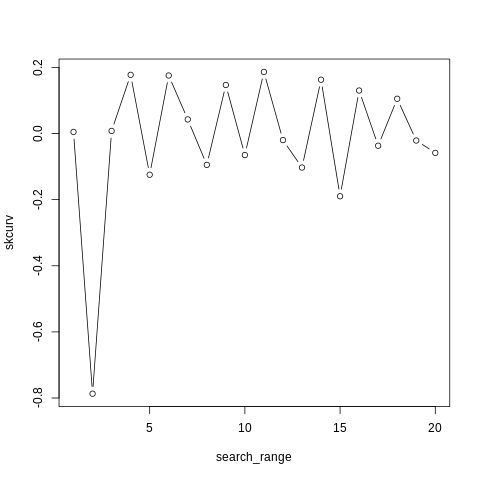

In [ ]:
%%R -o term_norms

lsa_data <- performLSA(tdmw, alg = "rsvd", k = 100)
print(lsa_data$computation_time)

skcurv_mins <- findLSASkMins(lsa_data$lsam$sk)
skcurv_mins <- skcurv_mins[skcurv_mins > 2]
min_index = 2
lsa_dims <- 1:skcurv_mins[min_index]

#term_norms <- getOrderedTermNorms(voc$terms, lsa_data$tlsn, lsa_dims=lsa_dims)
#print(term_norms[1:1000,])
term_norms_df <- getOrderedTermNorms(voc$terms, lsa_data$tls, lsa_dims=lsa_dims)
print(term_norms_df[1:1000,])

# Convert dataframe term-norm to a named list with access based on term
# Note: a solution based on dataframe and row.names would have the drawback
# of partial matching
term_norms <- as.list(term_norms_df$norm)
names(term_norms) <- term_norms_df$term
print(term_norms['poem'])
print(term_norms['unknown_term'])

In [ ]:
%%R -o commongen_df

#  ----------------------------------------------
# |  HYPER-PARAMETERS                            |
# |  The norm thresholds are chosen empirically  |
#  ----------------------------------------------

# Minimum TF-IDF score for a sentence (i.e., normalized sum of the TF-IDF scores
# for the terms mentioned in the sentence) to be selected
sentence_norm_th = 1.4 #0.28

# Minimum TF-IDF score for a term to be selected within the concept set
word_norm_th = 0.3

# Valid length range (number of characters) for a sentence
min_sentence_length = 50  # 25
max_sentence_length = 110

# Min and max concept set length
min_word_set_size = 3
max_word_set_size = 5


#  ------------------------
# |  DATASET CONSTRUCTION  |
#  ------------------------

# Initializes the empty dataframe that will contain the final dataset 
commongen_df <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(commongen_df) <- c("concept_set", "sentence")

#tmp = 0

# For each document (post or comment)...
for (post_id in colnames(tdmw)) {

  # Get the sentences within the document
  p_sentences = sentences_df[post_id,]
  
  # For each sentence...
  for (sentence in p_sentences) {
    
    # Check for non-empty strings
    if (!nzchar(sentence))
      break

    # Preprocess sentence
    sentence <- gsub("[[:punct:]]+", "\\1 ", sentence) # Remove punctuation
    #sentence <- gsub("[[:digit:]]+", "\\1 ", sentence) # Remove digits
    sentence <- str_squish(sentence) # Remove extra spaces
    
    # Check sentence length
    s_length = nchar(sentence)
    if (s_length >= min_sentence_length &&
        s_length <= max_sentence_length) {
      
      # Initializes the empty dataframe that will contain the TF-IDF score
      # of each word mentioned in the sentence and covered by the vocabulary
      word_scores_df <- data.frame(matrix(ncol = 2, nrow = 0))
      colnames(word_scores_df) <- c("word", "score")

      # Get TF-IDF scores for the (unique) words in the sentence
      words <- strsplit(sentence, "\\s")[[1]]
      for (word in words) {
          word_score <- term_norms[[word]]
          if (!is.null(word_score)) {
            word_scores_df <- rbind(word_scores_df,
                                    data.frame(
                                        word=word,
                                        score=word_score))
          }
      }
      word_scores_df <- word_scores_df[!duplicated(word_scores_df['word']),]
      #print(word_scores_df)

      # We consider sentences with at least min_word_set_size detected words
      # in the vocabulary
      if (nrow(word_scores_df) >= min_word_set_size) {
          
          # Compute the score for the sentece as the sum of the TF-IDF scores
          # related to their terms, divided by the number of the last ones
          sentence_score = sum(word_scores_df$score) / nrow(word_scores_df)

          # We consider only sentences
          # - with a valid character length
          # - with a number of words compatible with the concept set range size
          # - with a minimum score for their information content
          if (sentence_score > sentence_norm_th) {
              
              #tmp = tmp + 1
              
              # Now we have the target sentence
              # and we need to set the input concept set

              # Keep the top-N words above a minimum TF-IDF (term-level) threshold
              word_scores_df <- orderBy(~-score, word_scores_df)
              word_set <- word_scores_df[word_scores_df$score > word_norm_th,]$word

              #print(sentence)
              #print(sentence_score)
              #print(word_set)

              # Add one or more records within the dataset (only if there is a
              # minum number of words above threshold)
              if (length(word_set) >= min_word_set_size) {
                  
                  concept_sets <- c()

                  if (length(word_set) > max_word_set_size) {
                      # If there many relevant words in a sentence,
                      # take each possible combination as concept set
                      #concept_sets <- c(concept_sets, combn(word_set, max_word_set_size, simplify=F))
                      concept_sets <- c(concept_sets, list(word_set[1:max_word_set_size]))
                  } else {
                      concept_sets <- c(concept_sets, list(word_set))
                  }

                  for (concept_set in concept_sets) {
                      concept_set_rnd <- sample(concept_set) # Shuffle
                      concept_set <- paste(concept_set_rnd, collapse=' ')
                      #print(concept_set)
                      commongen_df <- rbind(commongen_df,
                                            data.frame(
                                                concept_set=concept_set,
                                                sentence=sentence))
                  }
                  #print("-------------")

              }

          }

      }

    }

  }

  #if (tmp > 50)
  #  break

}

**Splitting**

In [ ]:
%%R

print(nrow(commongen_df))
test_id <- 19003
print(commongen_df$concept_set[test_id])
print(commongen_df$sentence[test_id])

[1] 19926
[1] "sips food accompanied water"
[1] "the food goes down normally but it must always be accompanied with sips of water"


In [ ]:
commongen_df.to_csv('a_commongen_en_lsa_s_14_03_50_110.csv', index=False)

In [ ]:
%%R -o commongen_df

commongen_df = read.csv('a_commongen_en_tfidf_s_28_32_50_110.csv', sep=",")

In [ ]:
type(commongen_df)

pandas.core.frame.DataFrame

In [ ]:
%%R -o concept_set_sizes -o sentence_lengths

concept_set_sizes = unlist(lapply(commongen_df$concept_set, FUN = function(x) length(unlist(strsplit(x, "\\s")))))
print(table(concept_set_sizes))

sentence_lengths = unlist(lapply(commongen_df$sentence, FUN = function(x) nchar(x)))
print(table(sentence_lengths))

concept_set_sizes
   3    4    5 
8326 6289 6098 
sentence_lengths
 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69 
332 377 334 351 392 356 380 354 384 339 363 377 372 402 380 405 428 384 383 361 
 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89 
403 393 385 345 393 397 353 412 384 376 330 342 347 310 352 367 342 331 343 330 
 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 
315 339 308 304 320 310 302 311 309 299 282 253 281 272 265 282 287 254 264 230 
110 
237 


In [ ]:
import numpy as np
from itertools import starmap

def assign_length_range(x):
  length_range = {'50_69': range(50, 69),
                  '70_89': range(70, 89),
                  '90_110': range(90, 110)}
  for label, r in length_range.items():
    if x in r:
      return label

assign_length_range_v = np.vectorize(assign_length_range)

commongen_df['label'] = list(starmap(
    "{}:{}".format,
    zip(
        concept_set_sizes,
        assign_length_range_v(sentence_lengths))))
print(commongen_df)

                                             concept_set  ...     label
1               padua stomach zaninotto control football  ...   5:50_69
2                    advice padua operate center calcium  ...  5:90_110
3                            esophageal achalasia memory  ...   3:50_69
4                    june operated venice zaninotto prof  ...   5:70_89
5                esophageal symptoms achalasia diagnosed  ...  4:90_110
...                                                  ...  ...       ...
20709                          hospital palermo operated  ...   3:50_69
20710                      plastic antireflux heller dor  ...  4:90_110
20711  check esophagogastroduodenoscopy complications...  ...  4:90_110
20712                            centers diagnosis exams  ...   3:70_89
20713    centers esophageal surgery excellence achalasia  ...   5:70_89

[20713 rows x 3 columns]


In [ ]:
commongen_df.groupby('concept_set')['sentence'].apply(lambda x: np.mean(x.str.len())).reset_index(name='avg_sentence_length')

In [ ]:
commongen_df['concept_set_id'] = commongen_df.groupby('concept_set').grouper.group_info[0]
print(commongen_df)
print(commongen_df.concept_set_id.unique())

                                             concept_set  ... concept_set_id
1               padua stomach zaninotto control football  ...          12888
2                    advice padua operate center calcium  ...            564
3                            esophageal achalasia memory  ...           5863
4                    june operated venice zaninotto prof  ...           9402
5                esophageal symptoms achalasia diagnosed  ...           6144
...                                                  ...  ...            ...
20709                          hospital palermo operated  ...           8862
20710                      plastic antireflux heller dor  ...          13917
20711  check esophagogastroduodenoscopy complications...  ...           2268
20712                            centers diagnosis exams  ...           2192
20713    centers esophageal surgery excellence achalasia  ...           2193

[20713 rows x 4 columns]
[12888   564  5863 ...  2268  2192  2193]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

#  -------
# |  OLD  |
#  -------

# Shuffle the whole dataset first
# and then split the dataset into the following parts:
# - 80% training set
# - 10% validation set
# - 10% test set
# Notes:
# - the first element denotes size for train (0.8)
# - the second element denotes size for validation (1 - 0.9 = 0.1)
# - and the difference between the two denotes size for test (0.9 - 0.8 = 0.1)
train, validation, test = \
  np.split(commongen_df.sample(frac=1, random_state=42),
           [int(.8*len(commongen_df)), int(.9*len(commongen_df))])

#  ----------------
# |  INTERMEDIATE  |
#  ----------------

# https://realpython.com/train-test-split-python-data/
# https://datascience.stackexchange.com/questions/82863/how-to-split-train-test-datasets-having-equal-classes-proportion 

# Keep the same "concept set size" and "sentence length" proportions
# across the splits. The concept set size distribution and the related
# sentence lengths should be constant along with the different splits
# (train, validation, test). This avoids having an imbalance within a split
# in terms of the number of words from which to generate a sentence and
# the length of the prediction in characters.
# 
# Notes:
# - stratify parameter from sklearn ensure the class distribution is similar
#   between train and test data
# - this is different from splitting the dataset in equal classes proportion
# - split to a validation set it's not implemented in sklearn, but we can use
#   a trick
# - stratify considers only one class; we need to combine multiple labels as
#   a single feature
train, test = train_test_split(
    commongen_df, test_size=0.1, random_state=42, stratify=commongen_df['label'])
train, validation = train_test_split(
    train, test_size=0.1, random_state=42, stratify=train['label'])

#  ---------
# |  FINAL  |
#  ---------

# https://stackoverflow.com/questions/61804274/pandas-groupby-training-validation-split

# We perform an unbiased evaluation of prediction performance making sure
# the concept sets are fresh (i.e., not seen by the model before)
# Removal of duplicate concept sets across multiple splits
train_cs_ids, test_cs_ids = train_test_split(
    commongen_df.concept_set_id.unique(),
    test_size=0.1,
    random_state=42)
train_cs_ids, validation_cs_ids = train_test_split(
    train_cs_ids,
    test_size=0.1,
    random_state=42)
train = commongen_df[commongen_df.concept_set_id.isin(train_cs_ids)]
validation = commongen_df[commongen_df.concept_set_id.isin(validation_cs_ids)]
test = commongen_df[commongen_df.concept_set_id.isin(test_cs_ids)]

# --------------------

# Remove temp labels from dataframes
del train['label'], validation['label'], test['label']
del train['concept_set_id'], validation['concept_set_id'], test['concept_set_id']

# Save splits as .csv files
train.to_csv('train.csv', sep='\t', index=False)
validation.to_csv('validation.csv', sep='\t', index=False)
test.to_csv('test.csv', sep='\t', index=False)

**Train, Validation, Test**

**Opinion mining**

  |======================================================================| 100%


R[write to console]: Percentage of pos documents: 41

R[write to console]: Percentage of neg documents: 59



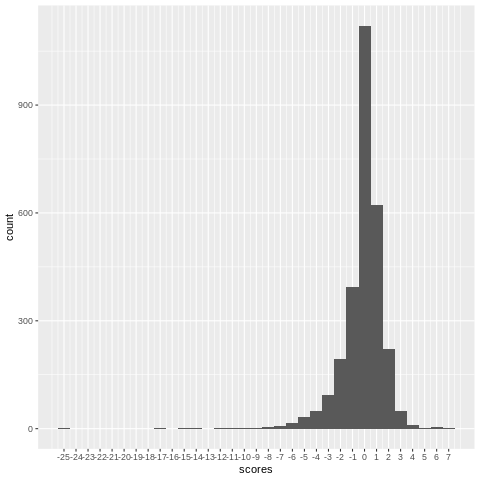

In [ ]:
%%R -i documents

# Opinion mining class for each document
documents$class <- docsClassificationFun(documents$id_tagged_text)

#### Only for experiments on the complete dataset

<font color="blue"> Select the precomputed configuration to adopt </font>

In [ ]:
%%R

lemmatize <- F
concept_filter <- "all"

if (lemmatize) {
    if (concept_filter == "all") {
        concept <- concepts$all
        tdmc <- tdmc_ner_lemmatized_all
        opinion_classes <- opinion_classes_all
    } else if (concept_filter == "poem") {
        concept <- concepts$poem
        tdmc <- tdmc_ner_lemmatized_poem
        opinion_classes <- opinion_classes_poem
    } else if (concept_filter == "hellerdor") {
        concept <- concepts$hellerdor
        tdmc <- tdmc_ner_lemmatized_hellerdor
        opinion_classes <- opinion_classes_hellerdor
    }
} else {
    if (concept_filter == "all") {
        concept <- concepts$all
        tdmc <- tdmc_ner_unlemmatized_all
        opinion_classes <- opinion_classes_all
    }
}

#### In any case...

##### **Feature selection**

In [ ]:
%%R

# Feature selection from the complete term-document matrix
tdm_voc <- featureSelectionFun(tdmc)
voc = tdm_voc$voc
tdm = tdm_voc$tdm
dfm = tdm_voc$dfm
st_dfm = tdm_voc$st_dfm
et_dfm = tdm_voc$et_dfm
rm(tdm_voc)

##### **Term weighting**

In [ ]:
%%R

tdmw <- termWeightingFun(tdm)
dfmw <- quanteda::as.dfm(t(tdmw))

##### **Language modeling**

Semantic space construction.

<font color="blue">Check the difference between LSA and RSVD.</font>

In [ ]:
%%R
lsa_data <- performLSA(tdmw, alg = "lsa", k = 100)
print(lsa_data$computation_time)

Time difference of 2.591226 mins


In [ ]:
%%R
lsa_data <- performLSA(tdmw, alg = "rsvd", k = 100)
print(lsa_data$computation_time)

Time difference of 25.06812 secs


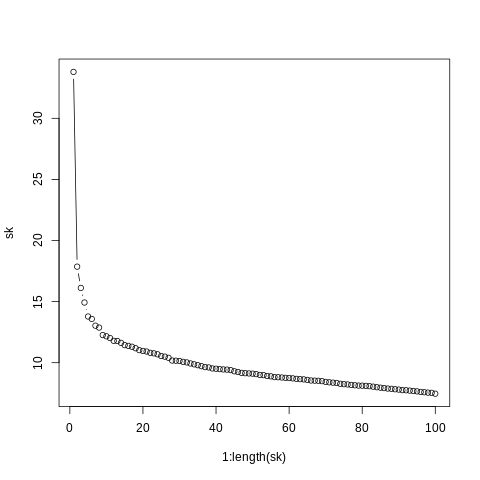

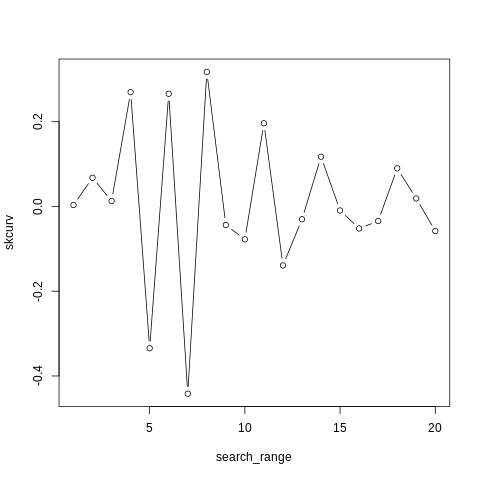

In [ ]:
%%R

# Power law curve with the significance of each latent semantic space dimension (LSA Sigma matrix)
showLSASkPowerLawCurve(lsa_data$lsam$sk)

# Calculate the significance of each latent dimension to select the ones to work with
# The informative contribution given by the dimensions associated with the eigenvalues that follow a knee point
# is lower, making an approximation possible
skcurv_mins <- findLSASkMins(lsa_data$lsam$sk)

# From a computational point of view, more than two dimensions are required
skcurv_mins <- skcurv_mins[skcurv_mins > 2]

##### **Wordclouds**

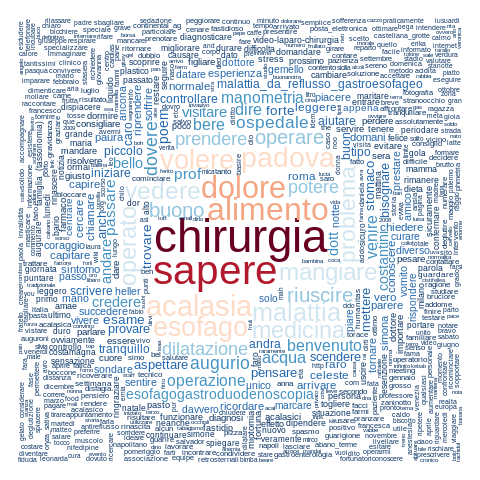

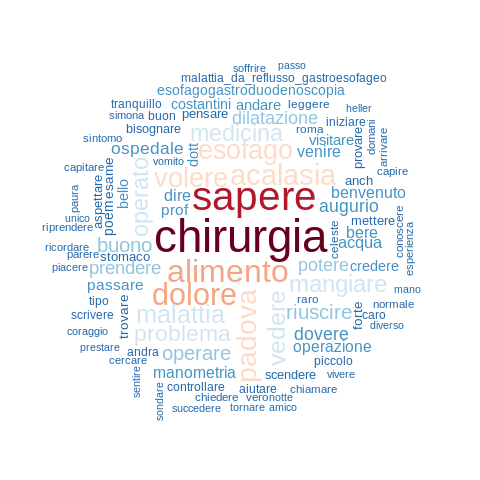

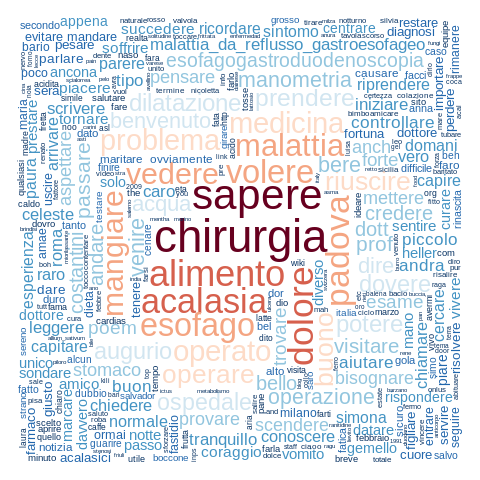

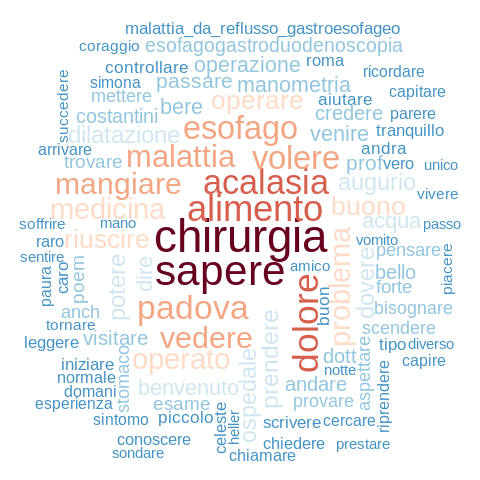

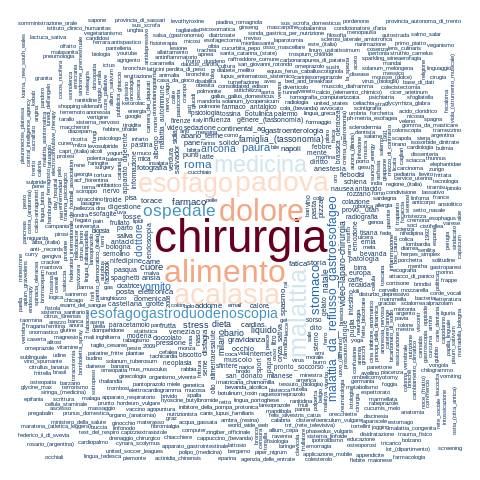

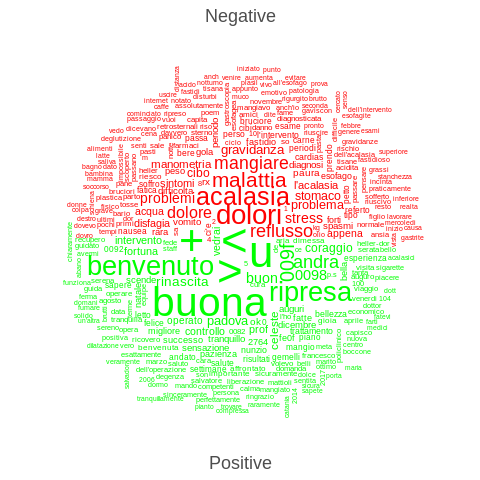

In [ ]:
%%R

# Wordclouds and statistics about the corpus
showWordCloud(dfm, term_labels = voc$terms_without_tag)
showWordCloud(dfm, term_labels = voc$terms_without_tag, max_words = 100)
showWordCloud(dfmw, term_labels = voc$terms_without_tag)
showWordCloud(dfmw, term_labels = voc$terms_without_tag, max_words = 100)
showWordCloud(et_dfm, term_labels = voc$entity_terms_without_tag)
showComparisonWordCloud(
  documents,
  text_field = "quality_text",
  classes = c("Positive", "Negative"),
  colors = c("red", "green"),
  stopwords = stopwords,
  min_termfreq = 3,
  max_words = 350)

##### **LSA distribution**

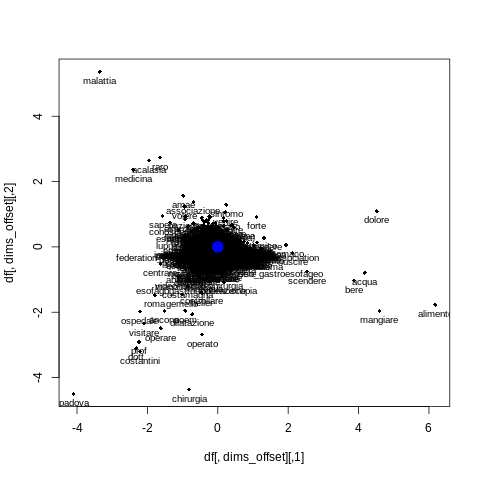

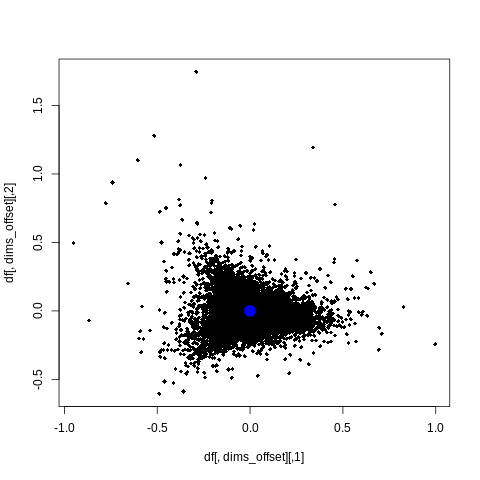

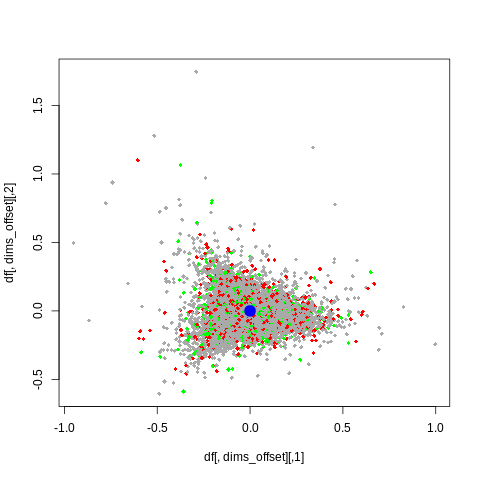

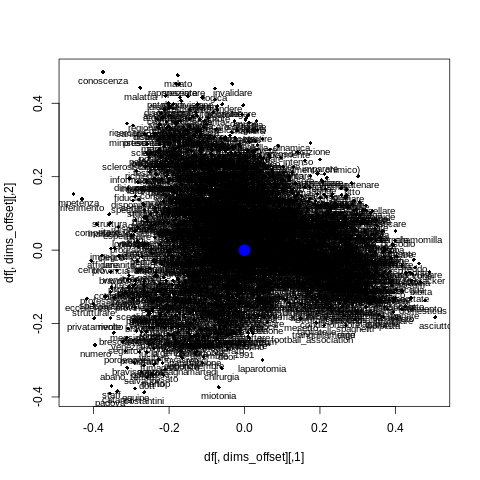

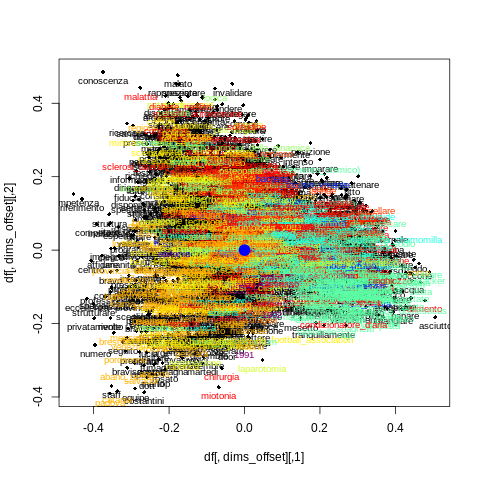

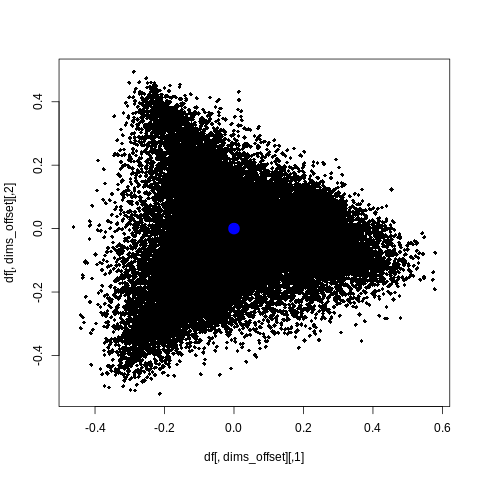

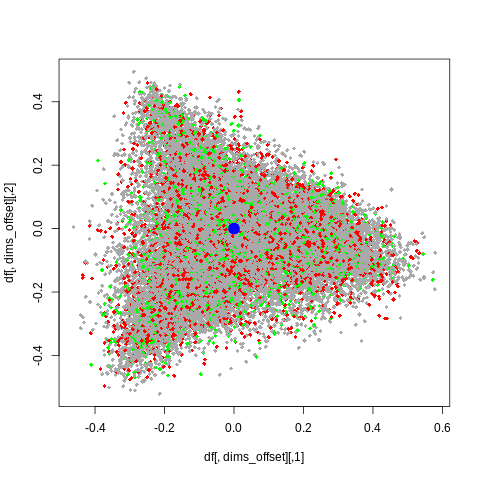

In [ ]:
%%R

# 2D terms and documents distribution in the latent semantic space
# - dims_offset => Explicit: 2:3; Implicit: -1.
# Italian
# - all_docs / poem <- 2:3
# English
# - all_docs <- 3:4
dims_2d <- 2:3
tr <- getTermsRepresentationWithNER(voc$terms_classes)
doc_class_cols <- getColsForOpinionClasses(documents$class)
show2DLSADataDistribution(df = lsa_data$tls, dims_offset = dims_2d, texts = voc$terms_without_tag)
show2DLSADataDistribution(df = lsa_data$dls, dims_offset = dims_2d)
show2DLSADataDistribution(df = lsa_data$dls, dims_offset = dims_2d, point_cols = doc_class_cols)
show2DLSADataDistribution(df = lsa_data$tlsn, dims_offset = dims_2d, texts = voc$terms_without_tag)
show2DLSADataDistribution(df = lsa_data$tlsn, dims_offset = dims_2d, texts = voc$terms_without_tag, text_cols = tr$terms_class_cols)
show2DLSADataDistribution(df = lsa_data$dlsn, dims_offset = dims_2d)
show2DLSADataDistribution(df = lsa_data$dlsn, dims_offset = dims_2d, point_cols = doc_class_cols)

In [ ]:
%%R

# Complete 2D visualization of the latent semantic space
pdf(file = paste0(lang, "_", concept$concept_name, "_lsa_2d.pdf"), width = 25.6, height = 14.4)
show2DLSA(
  tlsn = lsa_data$tlsn,
  dlsn = lsa_data$dlsn,
  dims_offset = dims_2d,
  doc_class_cols = doc_class_cols,
  terms_labels = voc$terms_without_tag,
  terms_class_cols = tr$terms_class_cols,
  terms_class_legend_text = tr$terms_class_legend_text,
  terms_class_legend_fill = tr$terms_class_legend_fill,
  qdlsn = NULL)
dev.off()

png 
  2 


##### **t-SNE**

*   t-SNE (t-Distributed Stochastic Neighbor Embedding, 2008) is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data
*   It maps multi-dimensional data to two or more dimensions suitable for human observation
*   It can deal with more complex patterns of Gaussian clusters in multidimensional space compared to PCA (1933)



In [ ]:
%%R

# Applies t-SNE on terms and documents (not normalized), considering all LSA dimensions
# Italian
# all docs --> perplexity = 50
# poem --> perplexity = 20
tsne_lsa_tls <- Rtsne::Rtsne(
  lsa_data$tls, dims = 2, check_duplicates = FALSE, perplexity = 20, verbose = TRUE, max_iter = 500)
tsne_lsa_dls <- Rtsne::Rtsne(
  lsa_data$dls, dims = 2, check_duplicates = FALSE, perplexity = 20, verbose = TRUE, max_iter = 500)
pdf(file = paste0(lang, "_", concept$concept_name, "_tsne_2d.pdf"), width = 25.6, height = 14.4)
showTsneTerms(
  tsne_docs = tsne_lsa_dls,
  tsne_terms = tsne_lsa_tls,
  doc_class_cols = doc_class_cols,
  terms_labels = voc$terms_without_tag,
  terms_class_cols = tr$terms_class_cols,
  terms_class_legend_text = tr$terms_class_legend_text,
  terms_class_legend_fill = tr$terms_class_legend_fill)
dev.off()

Performing PCA
Read the 2027 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 20.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.54 seconds (sparsity = 0.055547)!
Learning embedding...
Iteration 50: error is 78.553340 (50 iterations in 0.55 seconds)
Iteration 100: error is 78.040312 (50 iterations in 0.44 seconds)
Iteration 150: error is 78.002032 (50 iterations in 0.26 seconds)
Iteration 200: error is 78.001882 (50 iterations in 0.27 seconds)
Iteration 250: error is 78.001856 (50 iterations in 0.25 seconds)
Iteration 300: error is 2.432574 (50 iterations in 0.36 seconds)
Iteration 350: error is 2.172133 (50 iterations in 0.30 seconds)
Iteration 400: error is 2.068239 (50 iterations in 0.31 seconds)
Iteration 450: error is 2.014349 (50 iterations in 0.31 seconds)
Iteration 500: error is 1.983501 (50 iterations in 0.31 seconds)
Fitting performed in 3.34 seconds.
Performing PCA
Read the 67653 x 50 data ma

<img src="https://drive.google.com/uc?id=1glvNAvW-3PAhf4Qocqr-rEJgHhTQaqhj" alt="Tsne Focus 1" width="400"/>
<img src="https://drive.google.com/uc?id=18N1YSKeKHLiQI4qJr7Tmq3L9Ca-JAHJ-" alt="Tsne Focus 2" width="400"/>
<img src="https://drive.google.com/uc?id=1ArcmXAoFD6GEPmi_ZHCr_FEbo1CdIn0M" alt="Tsne Focus 3" width="400"/>
<img src="https://drive.google.com/uc?id=11nud00R9zD6mt90to-aYKGr1Wo-iAN5V" alt="Tsne Focus 4" width="400"/>

##### **Semantic Space Dimensions**

Select the number of LSA dimensions to work with, based on the minimum detected in the curvature function.

In [ ]:
%%R

min_index = 2
lsa_dims <- 1:skcurv_mins[min_index]

##### **Significant Terms**

Check the more relevant terms according to their 2-norm.

In [ ]:
%%R

# Italian all docs
# - min_index = 2
term_norms <- getOrderedTermNorms(voc$terms, lsa_data$tlsn, lsa_dims = dims_2d)
print(term_norms[1:10,])
term_norms <- getOrderedTermNorms(voc$terms, lsa_data$tlsn, lsa_dims = lsa_dims)
print(term_norms[1:10,])
term_norms <- getOrderedTermNorms(voc$terms, lsa_data$tls, lsa_dims = lsa_dims)
print(term_norms[1:10,])
term_norms <- getOrderedTermNorms(voc$terms, lsa_data$tls)
print(term_norms[1:10,])
term_norms <- getOrderedTermNorms(voc$terms, lsa_data$tlsn)
print(term_norms[1:10,])

                                                                                                                                  term
891                                                                                                                         conoscenza
825                                                                                                                           asciutto
1215                         <e>padova<t>city;place;sport</t><c>place</c><wd>q617</wd><wl>http://it.wikipedia.org/wiki/padova</wl></e>
1599                      <e>catania<t>city;place;sport</t><c>place</c><wd>q1903</wd><wl>http://it.wikipedia.org/wiki/catania</wl></e>
1214          <e>malattia<t>deathcause;organization</t><c>disease</c><wd>q12136</wd><wl>http://it.wikipedia.org/wiki/malattia</wl></e>
388                                                                                                                             malato
906                                                    

##### **Semantically Nearest Documents**

Write a query, make its fold-in and see the top-N documents semantically related to it.

*Note:* post and comment text is provided for sample only; if the indexes returned do not belong to the latter, NA will be returned. To appreciate the effectiveness of this operation, be sure to perform the analysis only on the sample.

In [ ]:
%%R

new_doc <- makeUserQuery(
  "Gemelli",
  userQueryPreprocessingNer,
  applyTermWeightingToDocument,
  tdmw,
  lsa_data$lsam)

# Top-N documents semantically related to the user query
n_nearest <- 10
nearest_docs <- findTopNearestDocuments(
  texts = documents$text,
  dls = lsa_data$dls,
  lsa_dims = lsa_dims,
  query_ls = new_doc$ls_q,
  n = n_nearest)
print(nearest_docs)

 [1] NA NA NA NA NA NA NA NA NA NA


##### **Gold Standard Evaluation**

≈ 15 minutes required ⏱

In [ ]:
%%R

# Gold standard evaluation
eval_res <- evaluateLatentSemanticSpace(
  gold_standards$kc_pos, gold_standards$kc_neg,
  voc$terms_without_tag, voc$terms,
  tdmw, applyTermWeightingToDocument, lsa_data$lsam, lsa_dims,
  list(list(.7, .7), list(.8, .8)))
print(eval_res)

[[1]]
[[1]]$min_pos_pvalue
[1] 0.7

[[1]]$max_pos_pvalue
[1] 0.7

[[1]]$tp
[1] 127

[[1]]$tn
[1] 37

[[1]]$fp
[1] 51

[[1]]$fn
[1] 29

[[1]]$accuracy
[1] 67.21311

[[1]]$precision
[1] 71.34831

[[1]]$misclassification_rate
[1] 32.78689

[[1]]$tpr
[1] 81.41026

[[1]]$tnr
[1] 42.04545

[[1]]$fpr
[1] 57.95455

[[1]]$fnr
[1] 18.58974

[[1]]$tpr_fpr_ratio
[1] 1.404726

[[1]]$f1
[1] 0.760479

[[1]]$pos_counts_by_category
                                  category all detectable detected
1  anatomicalstructure_anatomicalstructure   8          8        8
2              anatomicalstructure_disease  21         20       19
3                       diagnosis_features  12         12        9
4                           drug_drugclass   7          7        7
5                             food_symptom   7          7        0
6                                  general   7          7        7
7                             place_doctor  19         14       12
8                 specializedcentre_doctor   

##### **Calibration**

In [ ]:
%%R
lsa_k_to_test <- c(50, 100, 200, 300, 500)
pvalue_thresholds_to_test <- list(
  # Common positive and negative thresholds
  list(.7, .7), list(.75, .75), list(.8, .8), list(.85, .85), list(.9, .9),
  # Thresholds with gap
  list(.7, .6), list(.75, .6), list(.8, .6), list(.85, .6), list(.9, .6),
  list(.7, .65), list(.75, .65), list(.8, .65), list(.85, .65), list(.9, .65),
  list(.75, .7), list(.8, .7), list(.85, .7), list(.9, .7),
  list(.8, .75), list(.85, .75), list(.9, .75),
  list(.85, .8), list(.9, .8))

all_eval_res <- list()

# Global space evaluation variables
best_k <- NA
best_min <- NA
best_eval_res <- NA

# Search the best latent space by gold standards representation
for (k in lsa_k_to_test) {
  
  message("testing k=", k)
  
  # Perform LSA
  lsa_data <- performLSA(tdmw, alg = "rsvd", k = k)
  
  # Detect minimums (possible knee points)
  skcurv_mins <- findLSASkMins(lsa_data$lsam$sk, search_range = 1:30)
  skcurv_mins <- skcurv_mins[skcurv_mins > 2]
  message("n minima to test: ", length(skcurv_mins))
  
  # Local space evaluation variables (i.e., local wrt the current dimensionality k)
  best_local_min <- NA
  best_local_eval_res <- NA
  
  # Search the best minimum
  for (min in skcurv_mins) {
    
    message("testing min=", min)
    
    # Select the dimension range
    lsa_dims <- 1:min
    
    # Gold standard evaluation
    eval_res <- evaluateLatentSemanticSpace(
      gold_standards$kc_pos, gold_standards$kc_neg,
      voc$terms_without_tag, voc$terms,
      tdmw, applyTermWeightingToDocument, lsa_data$lsam, lsa_dims,
      pvalue_thresholds_to_test)
    
    # Select the best pvalue threshold settings
    eval_res_best_settings <- selectLatentSpaceEvaluationWithMaximumScore(eval_res)
    
    message("min_pos_pvalue=", eval_res_best_settings$min_pos_pvalue)
    message("max_neg_pvalue=", eval_res_best_settings$max_neg_pvalue)
    message("accuracy=", eval_res_best_settings$accuracy)
    message("precision=", eval_res_best_settings$precision)
    message("tpr/fpr=", eval_res_best_settings$tpr_fpr_ratio)
    message("f1=", eval_res_best_settings$f1)
    
    # If the current tpr-fpr ratio improves the previous better result,
    # select the current minimum as knee point
    if (is.na(best_local_eval_res) ||
        best_local_eval_res$tpr_fpr_ratio < eval_res_best_settings$tpr_fpr_ratio) {
      best_local_min <- min
      best_local_eval_res <- eval_res_best_settings
    }
    
    # Save the result for current k + min
    all_eval_res <- c(eval_res,
                      list(
                        k = k,
                        min = min,
                        eval_res = eval_res
                      ))
    
  }
  
  # If the current best tpr-fpr ratio (obtained on all the minima)
  # exceeds that previously found with other k-values,
  # select the current k and the related min as the best combination
  if (is.na(best_eval_res) ||
      best_eval_res$tpr_fpr_ratio < best_local_eval_res$tpr_fpr_ratio) {
    best_k <- k
    best_min <- min
    best_eval_res <- best_local_eval_res
    best_lsa_data <- lsa_data
  }
  
}

R[write to console]: testing k=50

R[write to console]: n minima to test: 11

R[write to console]: testing min=3

R[write to console]: min_pos_pvalue=0.9

R[write to console]: max_neg_pvalue=

R[write to console]: accuracy=61.8852459016393

R[write to console]: precision=71.7241379310345

R[write to console]: tpr/fpr=1.43089430894309

R[write to console]: f1=0.691029900332226

R[write to console]: testing min=5

R[write to console]: min_pos_pvalue=0.9

R[write to console]: max_neg_pvalue=

R[write to console]: accuracy=65.983606557377

R[write to console]: precision=81.1965811965812

R[write to console]: tpr/fpr=2.43589743589744

R[write to console]: f1=0.695970695970696

R[write to console]: testing min=7

R[write to console]: min_pos_pvalue=0.9

R[write to console]: max_neg_pvalue=

R[write to console]: accuracy=63.5245901639344

R[write to console]: precision=86.8131868131868

R[write to console]: tpr/fpr=3.71367521367521

R[write to console]: f1=0.639676113360324

R[write to consol

##### **Phenomena Explanation**

Explanation for the positive opinion of patients

In [ ]:
%%R -i lemmatize

# Italian
# poem (k=100, min_index = 2)
# - POS
#   - userQueryPreprocessingNer("familiari"), min_similarity_closeness = 0.93, n_semantically_closest_terms = 5, max_pvalue_threshold = 0.001
#   - userQueryPreprocessingNer("costamagna"), min_similarity_closeness = 0.93, n_semantically_closest_terms = 5, max_pvalue_threshold = 0.001
#   - userQueryPreprocessingNer("gemelli"), min_similarity_closeness = 0.93, n_semantically_closest_terms = 5, max_pvalue_threshold = 0.001
#   - userQueryPreprocessingNer("reflusso"), min_similarity_closeness = 0.9, n_semantically_closest_terms = 50, max_pvalue_threshold = 0.001

pos_description <- descriptiveAnalysisLSA(
  tdm = tdmw,
  termWeightingDocFun = applyTermWeightingToDocument,
  lsa_data = lsa_data,
  lsa_dims = lsa_dims,
  starting_query = userQueryPreprocessingNer("costamagna"),
  term_norm_threshold = 0.5,
  class = "Positive",
  doc_classes = opinion_classes, #documents$class
  min_similarity_closeness = 0.93,
  n_semantically_closest_terms = 5,
  max_pvalue_threshold = 0.001)
print(pos_description$text)
print(pos_description$pvalue)

[1] "costamagna gemello <e>asti<t>city;place</t><c>place</c><wd>q6122</wd><wl>http://it.wikipedia.org/wiki/asti</wl></e> <e>robotica<t>organization;fieldofstudy</t><c>organization</c><wd>q170978</wd><wl>http://it.wikipedia.org/wiki/robotica</wl></e> bonavina <e>rozzano<t>city;place</t><c>place</c><wd>q42794</wd><wl>http://it.wikipedia.org/wiki/rozzano</wl></e> repici equipe humanitas prof rosato fumagalli <e>abano_terme<t>city;place</t><c>place</c><wd>q34603</wd><wl>http://it.wikipedia.org/wiki/abano_terme</wl></e> <e>ancona<t>city;place</t><c>place</c><wd>q3415</wd><wl>http://it.wikipedia.org/wiki/ancona</wl></e> <e>milano<t>city;place;organization;sport</t><c>place</c><wd>q490</wd><wl>http://it.wikipedia.org/wiki/milano</wl></e>"
[1] 8.071042e-45


Explanation for the negative opinion of patients

In [ ]:
%%R

# Italian
# poem (k=100, min_index = 2)
# - NEG
#   - userQueryPreprocessingNer("ppi"), min_similarity_closeness = 0.9, n_semantically_closest_terms = 50, max_pvalue_threshold = 0.001
#   - userQueryPreprocessingNer("reflusso"), min_similarity_closeness = 0.9, n_semantically_closest_terms = 50, max_pvalue_threshold = 0.001
#   - userQueryPreprocessingNer("infiammazione"), min_similarity_closeness = 0.98, n_semantically_closest_terms = 5, max_pvalue_threshold = 0.001
#   - userQueryPreprocessingNer("difficolta"), min_similarity_closeness = 0.9, n_semantically_closest_terms = 5, max_pvalue_threshold = 0.001
#   - userQueryPreprocessingNer("dolore"), min_similarity_closeness = 0.98, n_semantically_closest_terms = 5, max_pvalue_threshold = 0.0000000000001
#   - userQueryPreprocessingNer("problemi liquido solido"), min_similarity_closeness = 0.96, n_semantically_closest_terms = 5, max_pvalue_threshold = 0.0000000001

neg_description <- descriptiveAnalysisLSA(
  tdm = tdmw,
  termWeightingDocFun = applyTermWeightingToDocument,
  lsa_data = lsa_data,
  lsa_dims = lsa_dims,
  starting_query = userQueryPreprocessingNer("dolore"),
  term_norm_threshold = 0.5,
  class = "Negative",
  doc_classes = opinion_classes, #documents$class
  min_similarity_closeness = 0.96,
  n_semantically_closest_terms = 5,
  max_pvalue_threshold = 0.0000000001)
print(neg_description$text)
print(neg_description$pvalue)

[1] " <e>dolore<t>disease;symptom;icd9classification</t><c>disease</c><wd>q81938</wd><wl>http://it.wikipedia.org/wiki/dolore</wl></e>  <e>ketorolac<t>drug;medicaltreatment;drugingredient;chemicalsubstance</t><c>drug</c><wd>q2014797</wd><wl>http://en.wikipedia.org/wiki/ketorolac</wl></e> <e>hyoscine_butylbromide<t>drug;medicaltreatment;chemicalsubstance</t><c>drug</c><wd>q419361</wd><wl>http://en.wikipedia.org/wiki/hyoscine_butylbromide</wl></e> tachidol <e>osso_mascellare<t>anatomicalstructure</t><c>anatomicalstructure</c><wd>q182895</wd><wl>http://it.wikipedia.org/wiki/osso_mascellare</wl></e> fortissimi <e>spalla<t>anatomicalstructure</t><c>anatomicalstructure</c><wd>q16363</wd><wl>http://it.wikipedia.org/wiki/spalla</wl></e> <e>costa_(anatomia)<t>anatomicalstructure</t><c>anatomicalstructure</c><wd>q196672</wd><wl>http://it.wikipedia.org/wiki/costa_(anatomia)</wl></e> <e>menopausa<t>disease;riskfactor;diseasecause</t><c>disease</c><wd>q177708</wd><wl>http://it.wikipedia.org/wiki/men

In [ ]:
%%R

pdf(file = paste0(lang, "_lsa_2d_pos_description.pdf"), width = 25.6, height = 14.4)
show2DLSA(
  tlsn = lsa_data$tlsn,
  dlsn = lsa_data$dlsn,
  dims_offset = dims_2d,
  doc_class_cols = doc_class_cols,
  terms_labels = voc$terms_without_tag,
  terms_class_cols = tr$terms_class_cols,
  terms_class_legend_text = tr$terms_class_legend_text,
  terms_class_legend_fill = tr$terms_class_legend_fill,
  qdlsn = pos_description$lsn)
dev.off()

pdf(file = paste0(lang, "_lsa_2d_neg_description.pdf"), width = 25.6, height = 14.4)
show2DLSA(
  tlsn = lsa_data$tlsn,
  dlsn = lsa_data$dlsn,
  dims_offset = dims_2d,
  doc_class_cols = doc_class_cols,
  terms_labels = voc$terms_without_tag,
  terms_class_cols = tr$terms_class_cols,
  terms_class_legend_text = tr$terms_class_legend_text,
  terms_class_legend_fill = tr$terms_class_legend_fill,
  qdlsn = neg_description$lsn)
dev.off()

png 
  2 


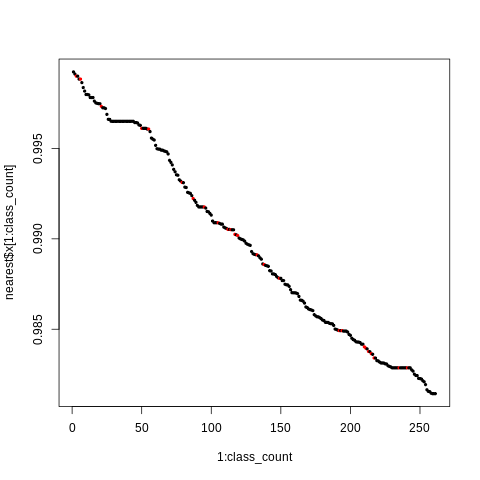

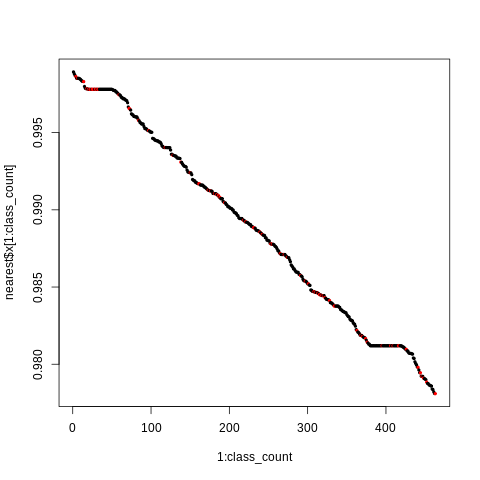

In [ ]:
%%R

showClassDescriptionIREffectiveness(
  lsa_data = lsa_data,
  lsa_dims = lsa_dims,
  class_description_query = pos_description,
  doc_classes = documents$class,
  class = "Positive")

showClassDescriptionIREffectiveness(
  lsa_data = lsa_data,
  lsa_dims = lsa_dims,
  class_description_query = neg_description,
  doc_classes = documents$class,
  class = "Negative")

##### **Hierarchical Clustering**

Standard HCA on terms

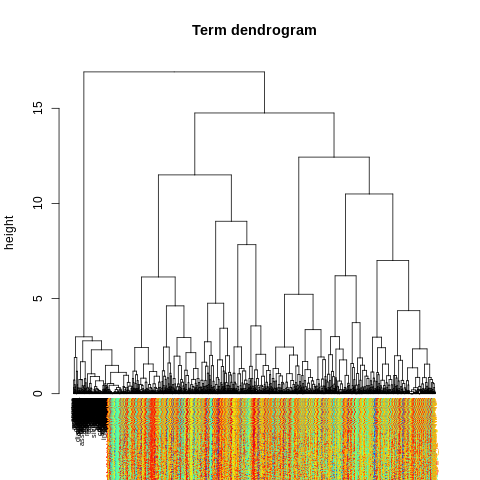

In [ ]:
%%R

std_clusters_lsa <- standardHca(x = lsa_data$tls[, lsa_dims],
                                dist_method = "cosine",
                                labels = voc$terms)

showDendrogramStandardHca(agglomerate = std_clusters_lsa$agglomerate,
                          d.labels = voc$terms,
                          d.labels_cols = tr$terms_class_cols,
                          d.labels_cex = 0.6,
                          d.title = "Term dendrogram",
                          d.x_label = "terms")

P-value HCA on terms

In [ ]:
%%R

pv_clusters_lsa <- pvalueHca(x = lsa_data$tls[, lsa_dims],
                             dist_method = "cosine",
                             nboot = 50,
                             r = seq(1.0, 2.0, by = .1),
                             min_pvalue = .95,
                             labels = voc$terms)

showDendrogramPvalueHca(agglomerate = pv_clusters_lsa$agglomerate,
                        min_pvalue = .95)

##### **Locality Sensitive Hashing (LSH)**

INFO [2020-12-02 08:25:44] band 01 sketch_time 0.066; self_join: 0.386 sec
INFO [2020-12-02 08:25:44] band 02 sketch_time 0.067; self_join: 0.270 sec
INFO [2020-12-02 08:25:44] band 03 sketch_time 0.069; self_join: 0.336 sec
INFO [2020-12-02 08:25:45] band 04 sketch_time 0.069; self_join: 0.258 sec
INFO [2020-12-02 08:25:45] band 05 sketch_time 0.066; self_join: 0.377 sec
INFO [2020-12-02 08:25:46] band 06 sketch_time 0.067; self_join: 0.351 sec
INFO [2020-12-02 08:25:46] band 07 sketch_time 0.068; self_join: 0.376 sec
INFO [2020-12-02 08:25:46] band 08 sketch_time 0.068; self_join: 0.296 sec
INFO [2020-12-02 08:25:47] band 09 sketch_time 0.068; self_join: 0.375 sec
INFO [2020-12-02 08:25:47] band 10 sketch_time 0.068; self_join: 0.303 sec
INFO [2020-12-02 08:25:56] aggregate after band # 10: 9.029 sec 30810529 candidates so far
INFO [2020-12-02 08:25:56] TOTAL TIME SPENT 13.978 sec
INFO [2020-12-02 08:25:57] band 01 sketch_time 0.002; self_join: 0.006 sec
INFO [2020-12-02 08:25:57] ba

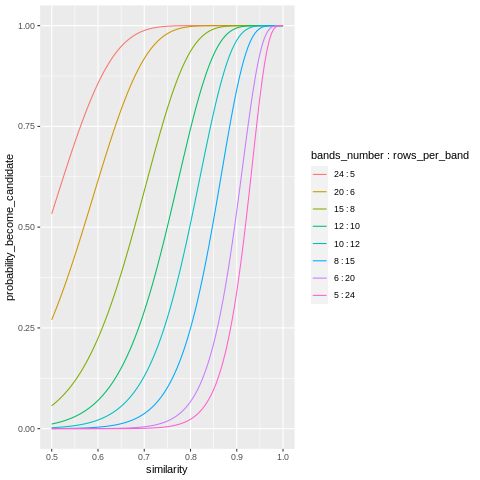

In [ ]:
%%R

hashfun_number = 120
s_curve <- get_s_curve(hashfun_number, n_bands_min = 5, n_rows_per_band_min = 5, plot = TRUE)

seed = 1
bands_number = 10
rows_per_band = 32

similar_docs <- LSHR::get_similar_pairs_cosine(
  lsa_data$dlsn[,lsa_dims], bands_number = bands_number, rows_per_band = rows_per_band, seed = seed)
similar_docs <- similar_docs[order(-N)]
similar_terms <- LSHR::get_similar_pairs_cosine(
  lsa_data$tlsn[,lsa_dims], bands_number = bands_number, rows_per_band = rows_per_band, seed = seed)
similar_terms <- similar_terms[order(-N)]
print(similar_docs[1:5,])

##### **Global Adjacencies**

In [ ]:
%%R

global_adjacencies <- calculateRelevantAdjacencies(
    tls = lsa_data$tls,
    lsa_dims = lsa_dims,
    terms = voc$terms,
    term_norms = term_norms$norm,
    top_n = 20,
    min_similarity = .95)

In [ ]:
%%R

global_adjacencies[["esame"]]

                                                                                                                                                               term
1                                                                                                                                                           referto
2               <e>apparato_digerente<t>anatomicalstructure</t><c>anatomicalstructure</c><wd>q9649</wd><wl>http://it.wikipedia.org/wiki/apparato_digerente</wl></e>
3                                      <e>bario<t>chemicalsubstance;drug;drugingredient</t><c>drug</c><wd>q1112</wd><wl>http://it.wikipedia.org/wiki/bario</wl></e>
4                                                                                                                                                             raggi
5         <e>alprazolam<t>chemicalsubstance;medicaltreatment;drug;drugingredient</t><c>drug</c><wd>q319877</wd><wl>http://it.wikipedia.org/wiki/alprazolam</wl></e>
6               